In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA

from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
csv_path = '/Users/mpillodi/documents/GitHub/wind-data-analysis/csvfolder/2013_03_14_0000.csv'

In [3]:
df = pd.read_csv(csv_path)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 44 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    144 non-null    object 
 1   time    144 non-null    object 
 2   period  144 non-null    int64  
 3   s1a     144 non-null    float64
 4   s1x     144 non-null    float64
 5   s1i     144 non-null    float64
 6   s1s     144 non-null    float64
 7   s2a     144 non-null    float64
 8   s2x     144 non-null    float64
 9   s2i     144 non-null    float64
 10  s2s     144 non-null    float64
 11  s3a     144 non-null    float64
 12  s3x     144 non-null    float64
 13  s3i     144 non-null    float64
 14  s3s     144 non-null    float64
 15  d1a     144 non-null    int64  
 16  d1s     144 non-null    int64  
 17  d2a     144 non-null    int64  
 18  d2s     144 non-null    int64  
 19  h1a     144 non-null    int64  
 20  h1x     144 non-null    int64  
 21  h1i     144 non-null    int64  
 22  t1

In [4]:
# Convert 'date' and 'time' columns to datetime format and set as index
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'])
df.set_index('datetime', inplace=True)
df.sort_index(inplace=True)
df.head()

date      time  period      s1a     s1x     s1i  \
datetime                                                                     
2013-03-14 00:10:00  2013-03-14  00:10:00     600  5.33426  6.1880  4.3979   
2013-03-14 00:20:00  2013-03-14  00:20:00     600  4.40249  5.1323  2.8832   
2013-03-14 00:30:00  2013-03-14  00:30:00     600  4.75592  5.4077  3.5717   
2013-03-14 00:40:00  2013-03-14  00:40:00     600  4.96706  5.8667  3.9389   
2013-03-14 00:50:00  2013-03-14  00:50:00     600  4.92575  5.5913  4.0766   

                         s1s      s2a     s2x     s2i  ...  tii  vxa  vxx  \
datetime                                               ...                  
2013-03-14 00:10:00  0.36261  5.29195  6.3247  4.3510  ...   44  126  126   
2013-03-14 00:20:00  0.33507  4.36477  5.0395  3.1117  ...   44  126  126   
2013-03-14 00:30:00  0.33507  4.67689  5.4067  3.5707  ...   44  125  126   
2013-03-14 00:40:00  0.36261  4.91098  5.6362  3.8920  ...   44  125  126   
2013-03-14 00:50:00  0.28917  4.88803  5.4526  3.9838  ...   44  125  125   

                     vxi  bla  blx  bli  bra  brx  bri  
datetime                                                
2013-03-14 00:10:00  125   83   83   83   83   83   83  
2013-03-14 00:20:00  125   83   83   83   83   83   83  
2013-03-14 00:30:00  125   83   83   83   83   83   83  
2013-03-14 00:40:00  125   83   83   83   83   83   83  
2013-03-14 00:50:00  125   83   83   83   83   83   83  

[5 rows x 44 columns]


Analysis for column: s1a
Descriptive Statistics:
count    144.000000
mean       9.565284
std        3.486053
min        4.402490
25%        6.544872
50%        9.492800
75%       11.905992
max       17.002040
Name: s1a, dtype: float64


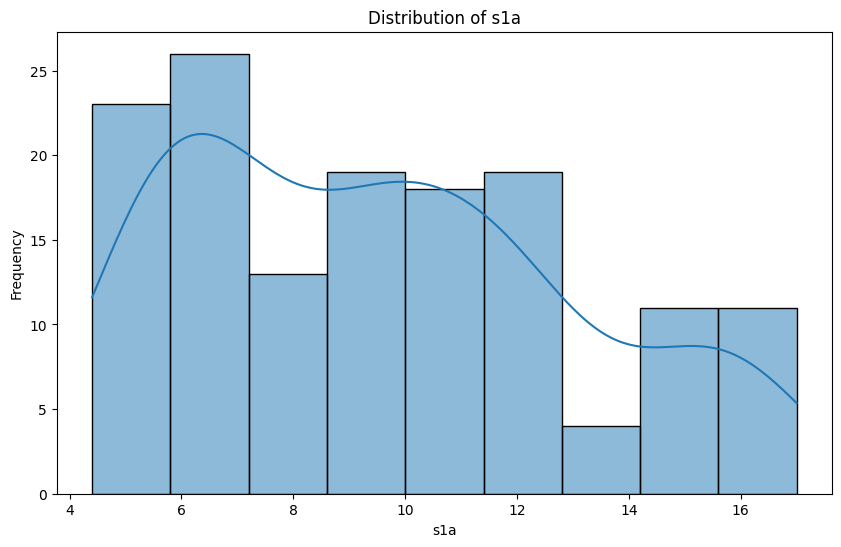


Analysis for column: s1x
Descriptive Statistics:
count    144.000000
mean      11.109819
std        3.780091
min        5.132300
25%        7.427300
50%       11.214050
75%       13.658225
max       18.672800
Name: s1x, dtype: float64


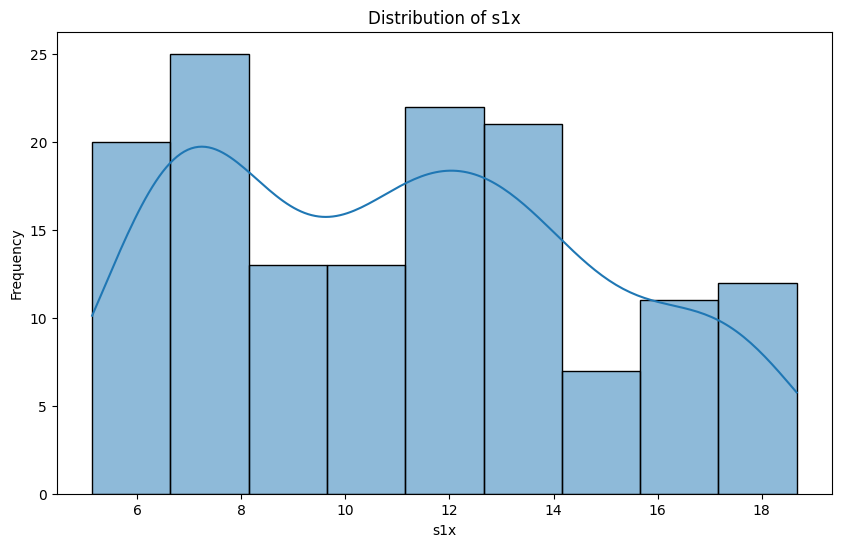


Analysis for column: s1i
Descriptive Statistics:
count    144.000000
mean       7.788444
std        3.273527
min        2.424200
25%        5.178200
50%        7.151900
75%        9.848525
max       15.505700
Name: s1i, dtype: float64


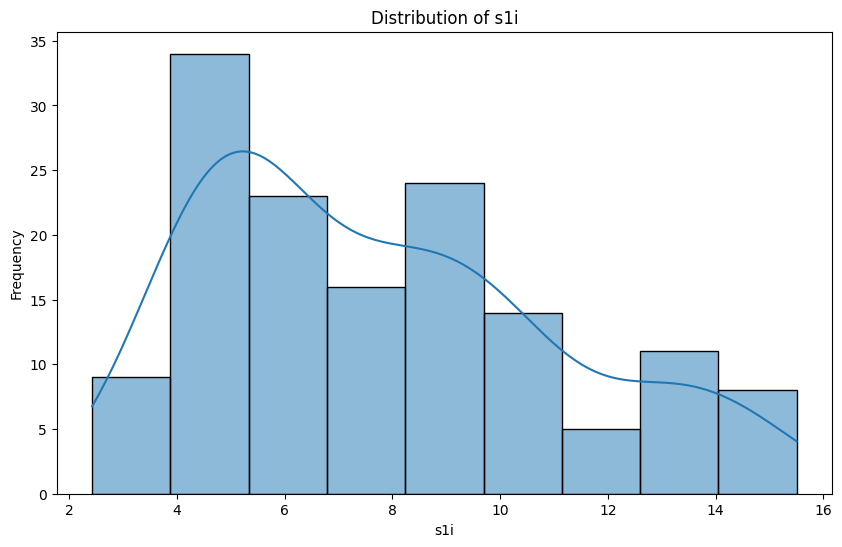


Analysis for column: s1s
Descriptive Statistics:
count    144.000000
mean       0.572858
std        0.159573
min        0.238680
25%        0.457852
50%        0.576045
75%        0.679320
max        1.069470
Name: s1s, dtype: float64


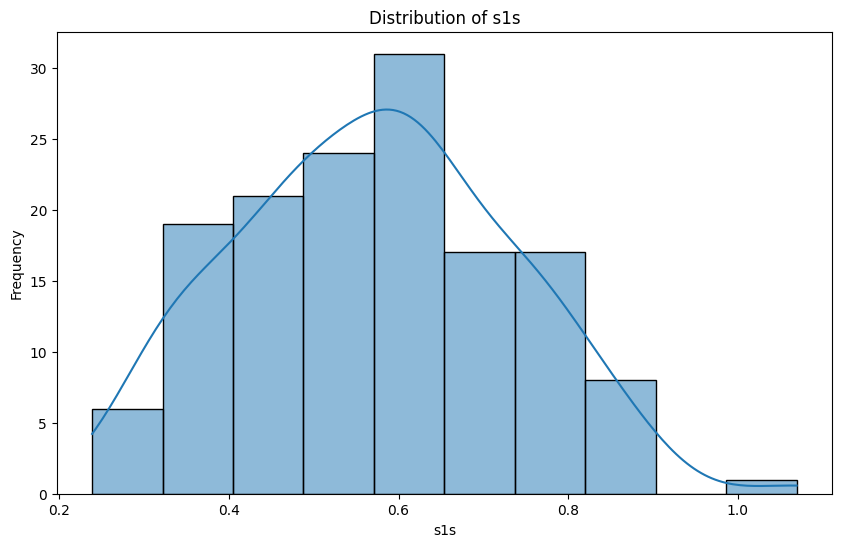


Analysis for column: s2a
Descriptive Statistics:
count    144.000000
mean       9.484819
std        3.440208
min        4.364770
25%        6.491087
50%        9.420655
75%       11.793685
max       16.831210
Name: s2a, dtype: float64


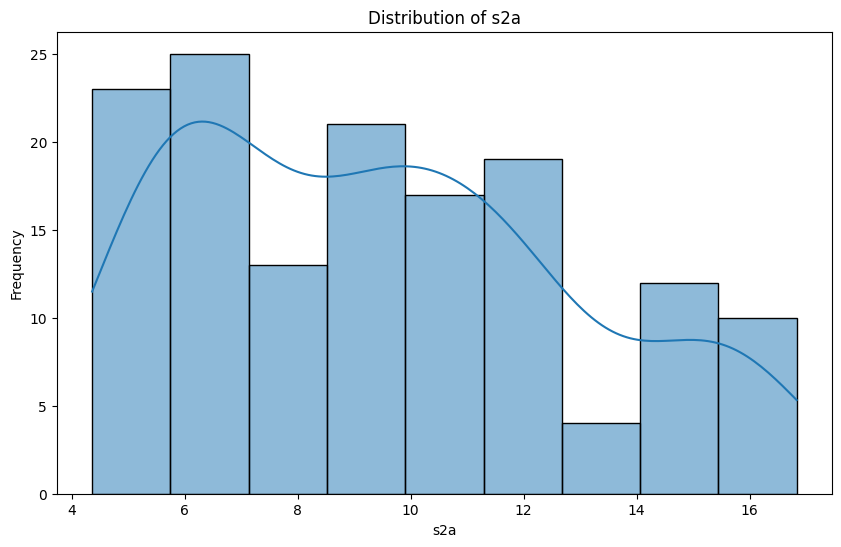


Analysis for column: s2x
Descriptive Statistics:
count    144.000000
mean      11.020206
std        3.736741
min        5.039500
25%        7.449250
50%       11.098300
75%       13.645750
max       18.396400
Name: s2x, dtype: float64


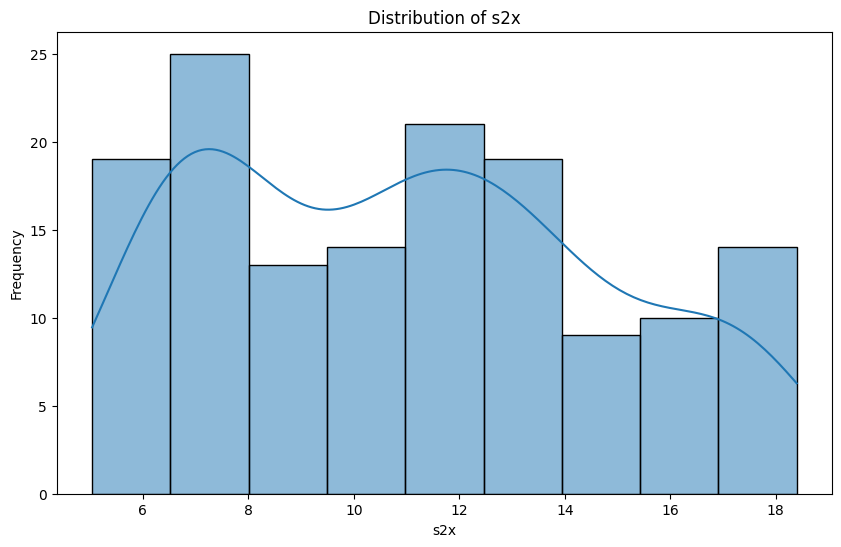


Analysis for column: s2i
Descriptive Statistics:
count    144.000000
mean       7.715088
std        3.188304
min        2.469100
25%        5.085400
50%        7.196800
75%        9.801625
max       15.275200
Name: s2i, dtype: float64


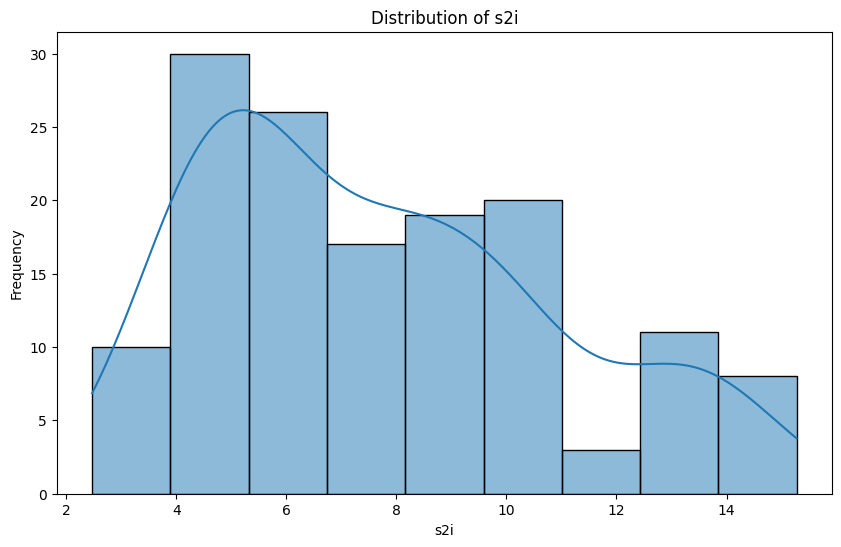


Analysis for column: s2s
Descriptive Statistics:
count    144.000000
mean       0.576491
std        0.159733
min        0.266220
25%        0.457852
50%        0.578340
75%        0.683910
max        1.055700
Name: s2s, dtype: float64


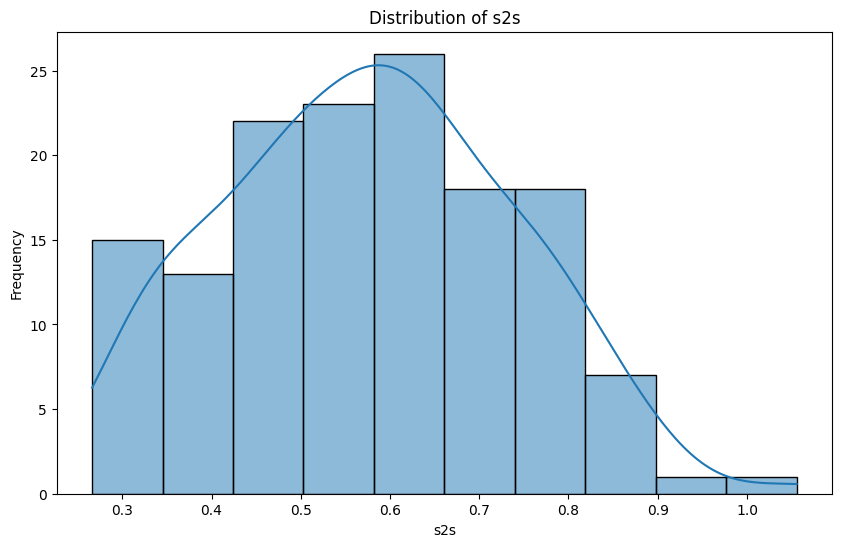


Analysis for column: s3a
Descriptive Statistics:
count    144.000000
mean       8.857836
std        3.043993
min        3.924710
25%        6.043902
50%        8.695190
75%       10.894660
max       15.112400
Name: s3a, dtype: float64


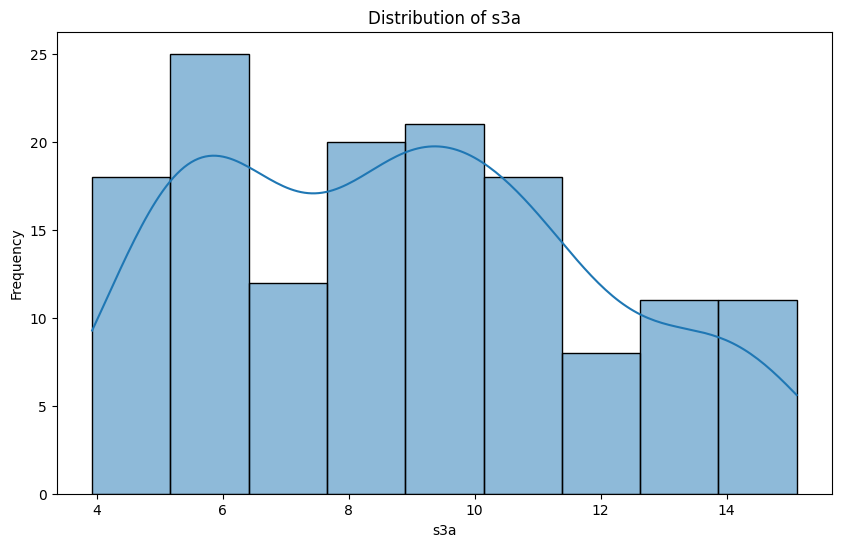


Analysis for column: s3x
Descriptive Statistics:
count    144.000000
mean      10.456470
std        3.396791
min        4.718260
25%        7.137903
50%       10.452010
75%       12.756977
max       16.919680
Name: s3x, dtype: float64


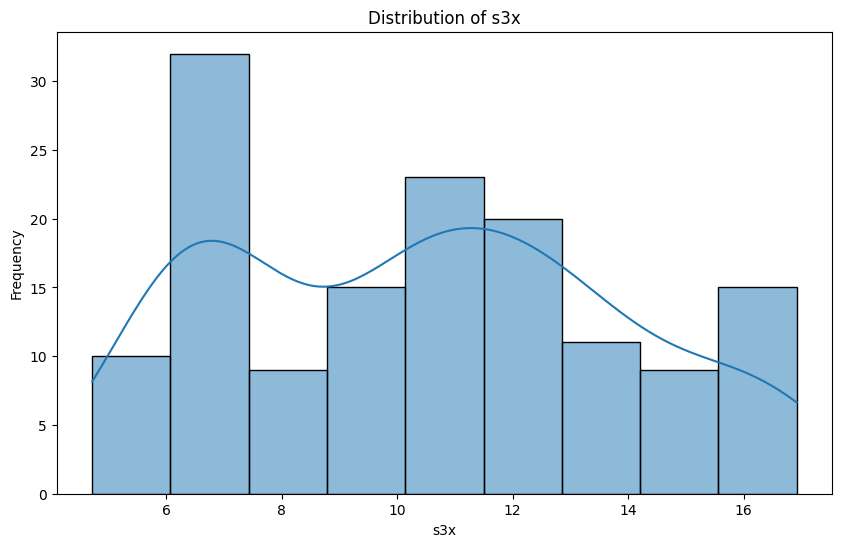


Analysis for column: s3i
Descriptive Statistics:
count    144.000000
mean       7.019405
std        2.848091
min        2.103670
25%        4.718260
50%        6.530125
75%        8.949768
max       13.387690
Name: s3i, dtype: float64


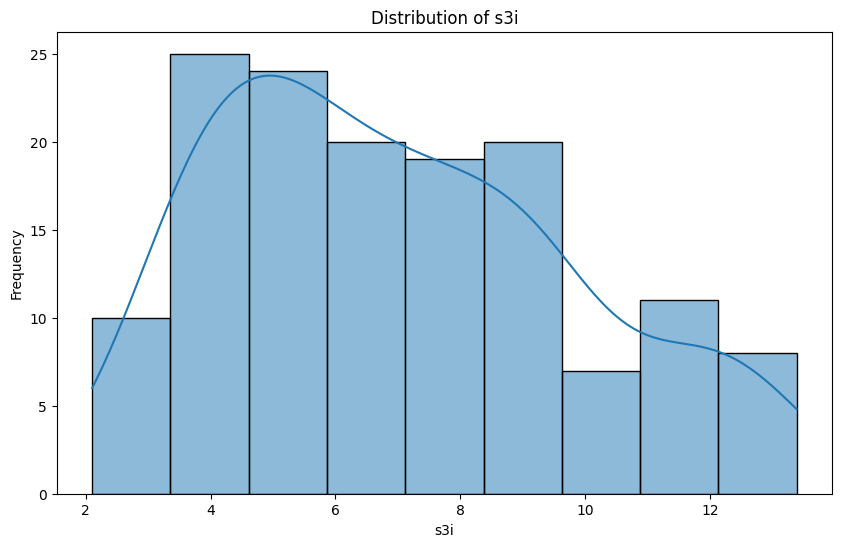


Analysis for column: s3s
Descriptive Statistics:
count    144.000000
mean       0.599304
std        0.167664
min        0.325680
25%        0.471313
50%        0.566495
75%        0.712128
max        1.087120
Name: s3s, dtype: float64


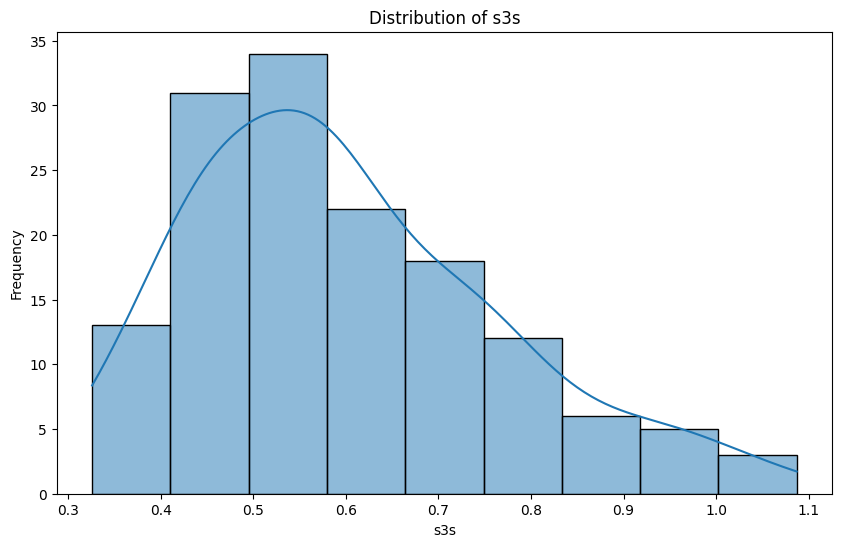


Analysis for column: d1a
Descriptive Statistics:
count    144.000000
mean     313.798611
std       11.941337
min      284.000000
25%      306.000000
50%      316.000000
75%      323.000000
max      332.000000
Name: d1a, dtype: float64


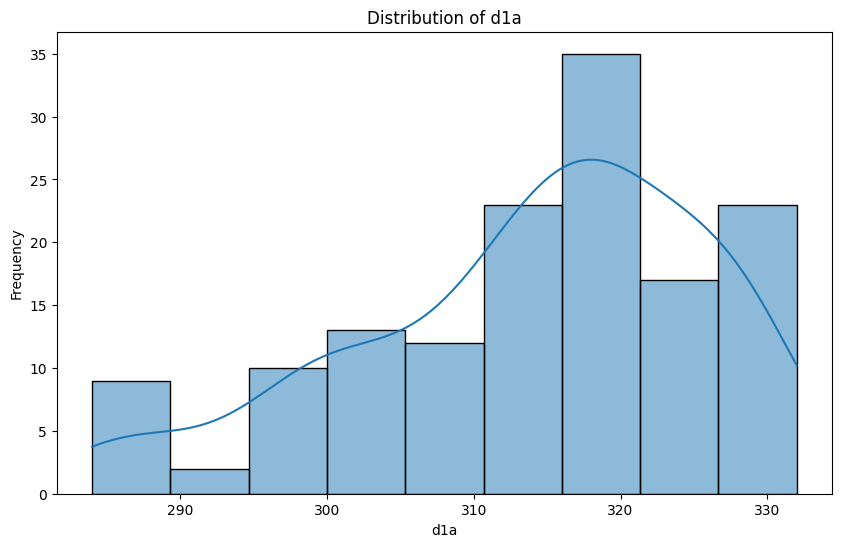


Analysis for column: d1s
Descriptive Statistics:
count    144.000000
mean       3.777778
std        1.080303
min        2.000000
25%        3.000000
50%        4.000000
75%        4.250000
max        7.000000
Name: d1s, dtype: float64


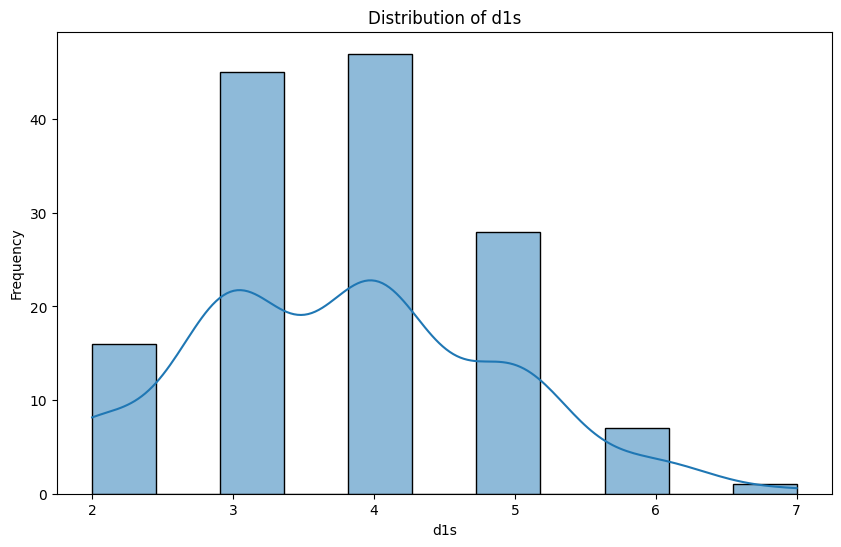


Analysis for column: d2a
Descriptive Statistics:
count    144.000000
mean     307.576389
std       11.083649
min      277.000000
25%      301.750000
50%      310.000000
75%      316.000000
max      325.000000
Name: d2a, dtype: float64


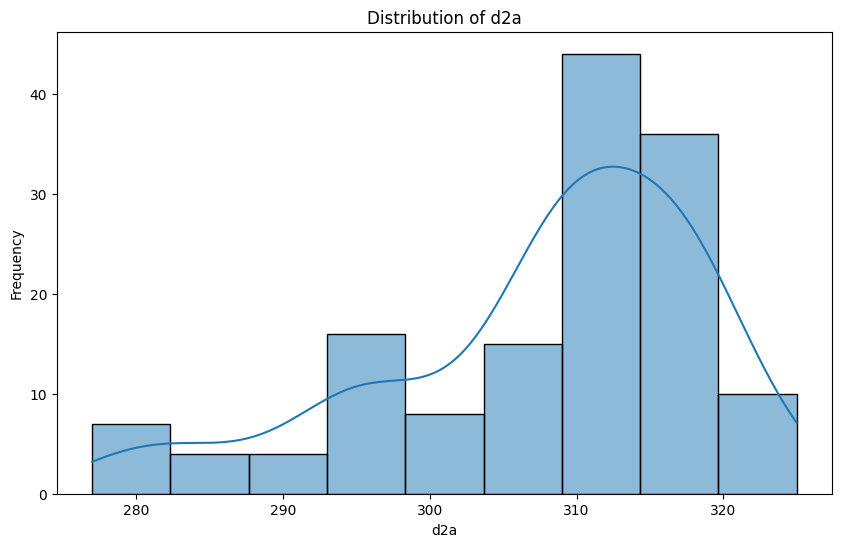


Analysis for column: d2s
Descriptive Statistics:
count    144.000000
mean       7.625000
std        5.069965
min        3.000000
25%        5.000000
50%        6.000000
75%        8.000000
max       38.000000
Name: d2s, dtype: float64


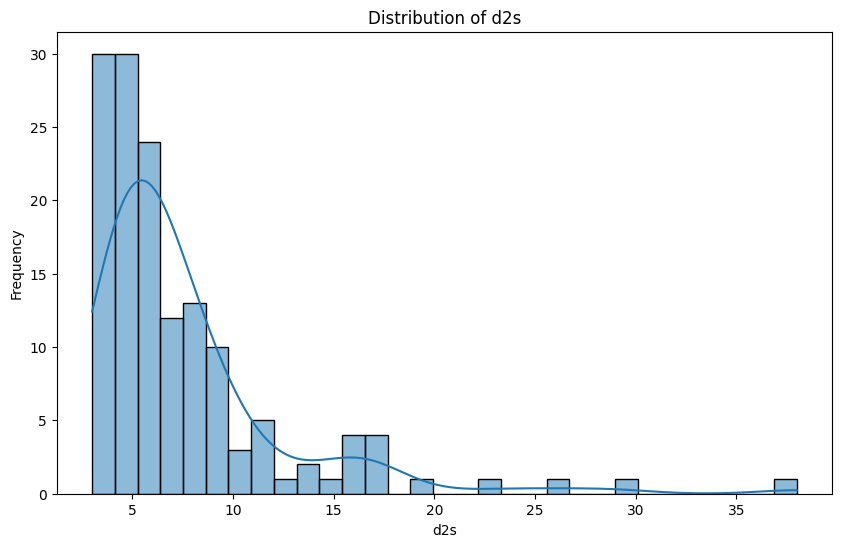


Analysis for column: h1a
Descriptive Statistics:
count    144.000000
mean     100.326389
std       12.110118
min       64.000000
25%      104.000000
50%      106.000000
75%      107.000000
max      107.000000
Name: h1a, dtype: float64


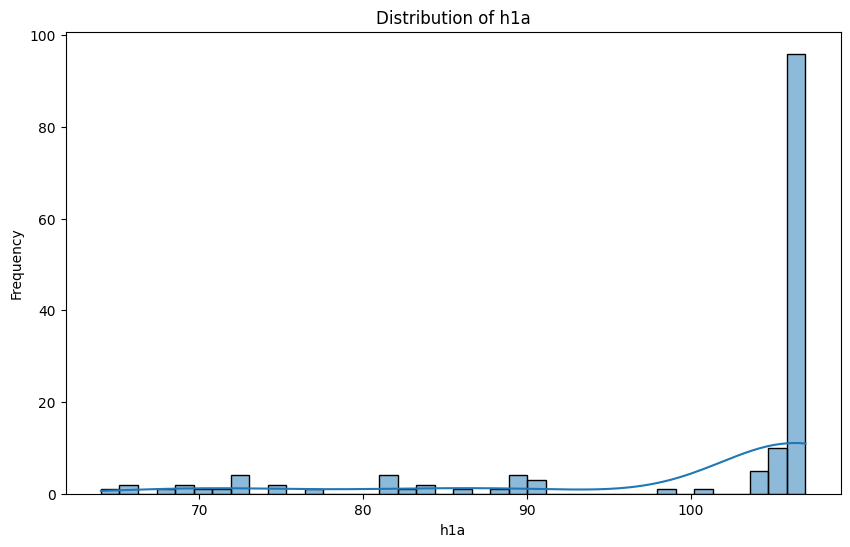


Analysis for column: h1x
Descriptive Statistics:
count    144.000000
mean     100.847222
std       11.537303
min       66.000000
25%      104.750000
50%      106.500000
75%      107.000000
max      108.000000
Name: h1x, dtype: float64


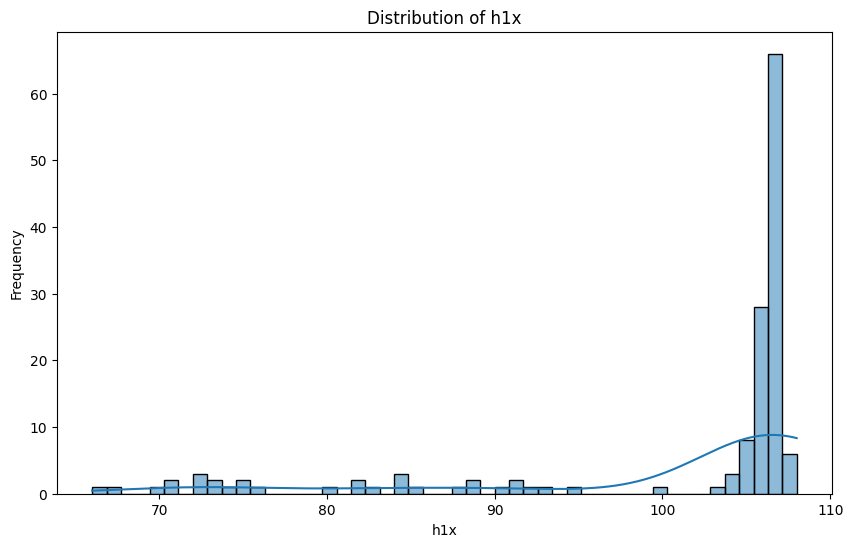


Analysis for column: h1i
Descriptive Statistics:
count    144.000000
mean      99.763889
std       12.713071
min       62.000000
25%      104.000000
50%      106.000000
75%      107.000000
max      107.000000
Name: h1i, dtype: float64


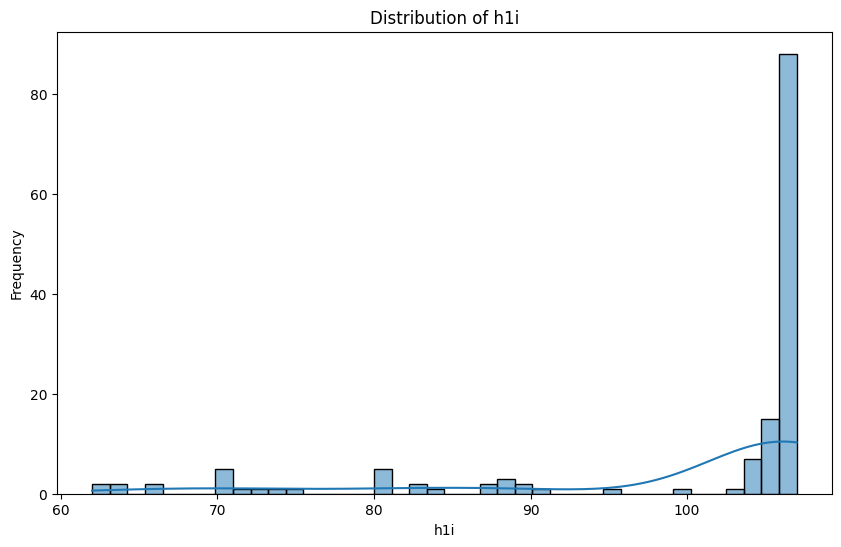


Analysis for column: t1a
Descriptive Statistics:
count    144.000000
mean       6.925694
std        2.201851
min        3.450000
25%        4.425000
50%        7.500000
75%        8.575000
max       10.950000
Name: t1a, dtype: float64


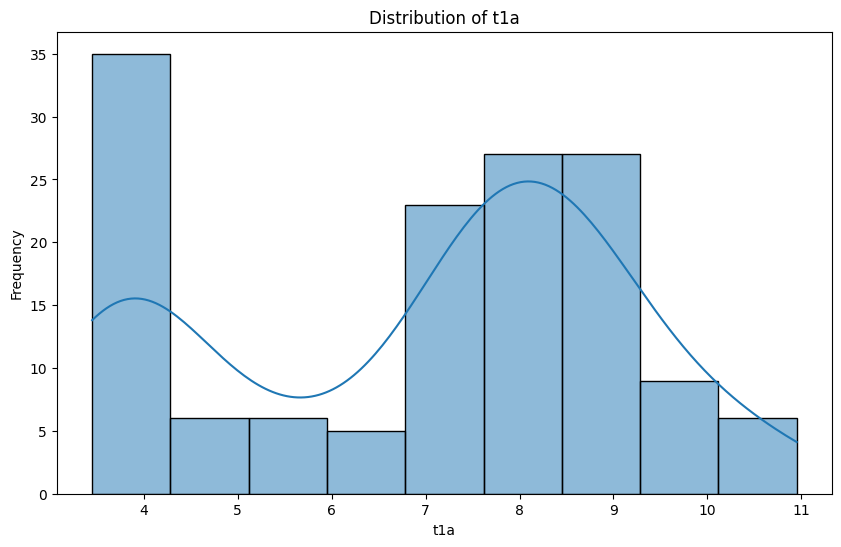


Analysis for column: t1x
Descriptive Statistics:
count    144.000000
mean       7.047917
std        2.265104
min        3.450000
25%        4.525000
50%        7.600000
75%        8.750000
max       11.250000
Name: t1x, dtype: float64


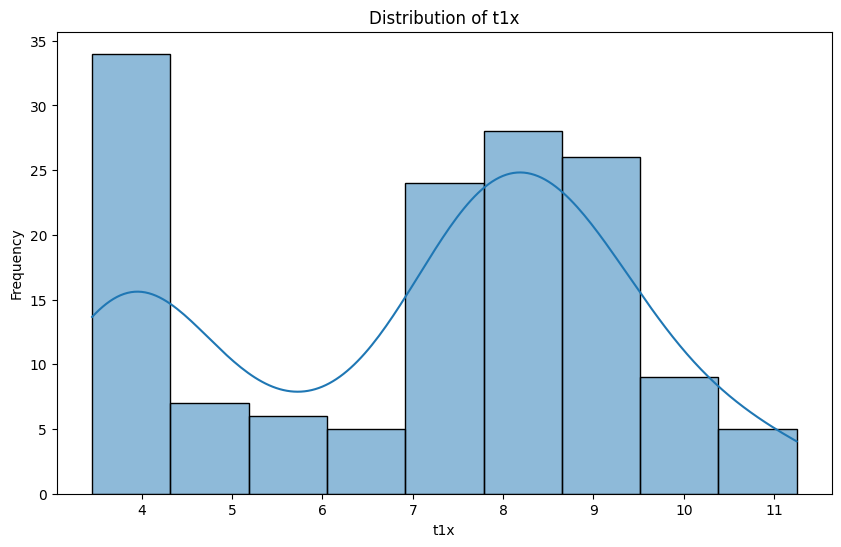


Analysis for column: t1i
Descriptive Statistics:
count    144.000000
mean       6.814583
std        2.135333
min        3.350000
25%        4.425000
50%        7.400000
75%        8.450000
max       10.550000
Name: t1i, dtype: float64


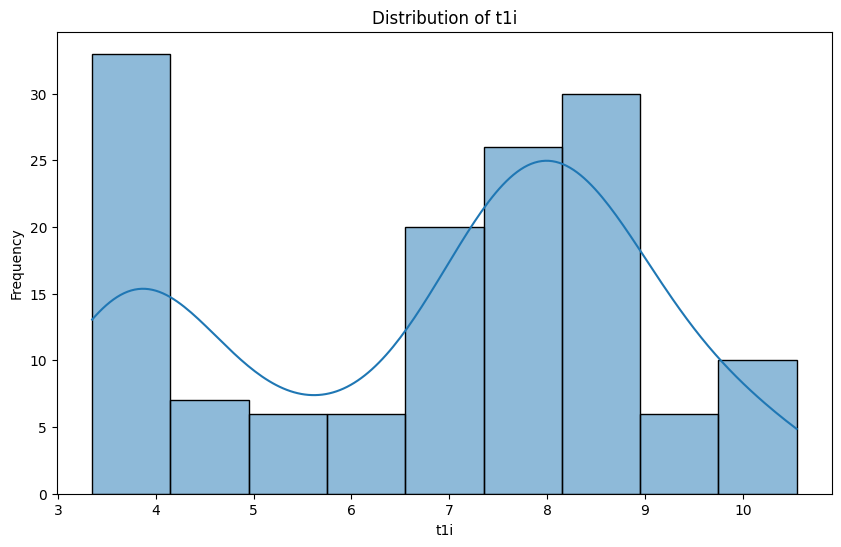


Analysis for column: b1a
Descriptive Statistics:
count     144.000000
mean     1005.979167
std         2.387229
min      1000.000000
25%      1005.000000
50%      1007.000000
75%      1008.000000
max      1009.000000
Name: b1a, dtype: float64


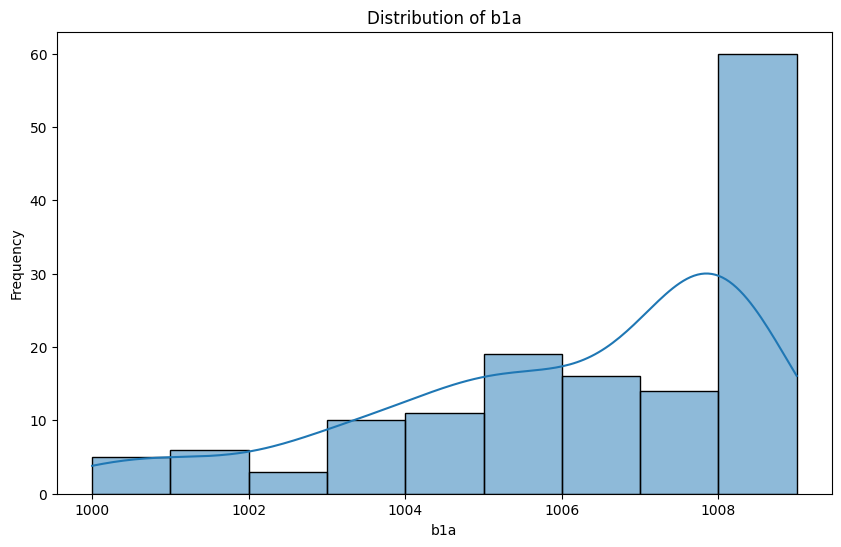


Analysis for column: b1x
Descriptive Statistics:
count     144.000000
mean     1006.347222
std         2.389720
min      1000.000000
25%      1005.000000
50%      1007.000000
75%      1008.000000
max      1009.000000
Name: b1x, dtype: float64


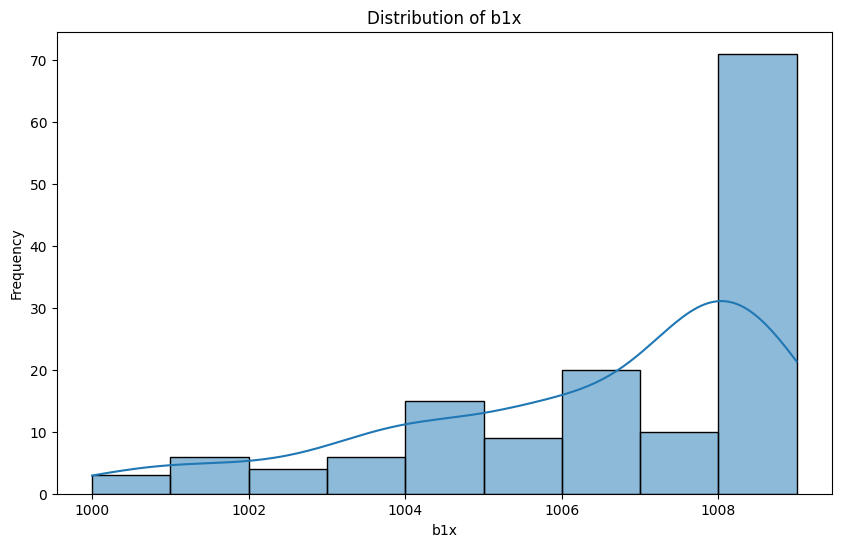


Analysis for column: b1i
Descriptive Statistics:
count     144.000000
mean     1005.590278
std         2.413288
min       999.000000
25%      1004.000000
50%      1007.000000
75%      1008.000000
max      1008.000000
Name: b1i, dtype: float64


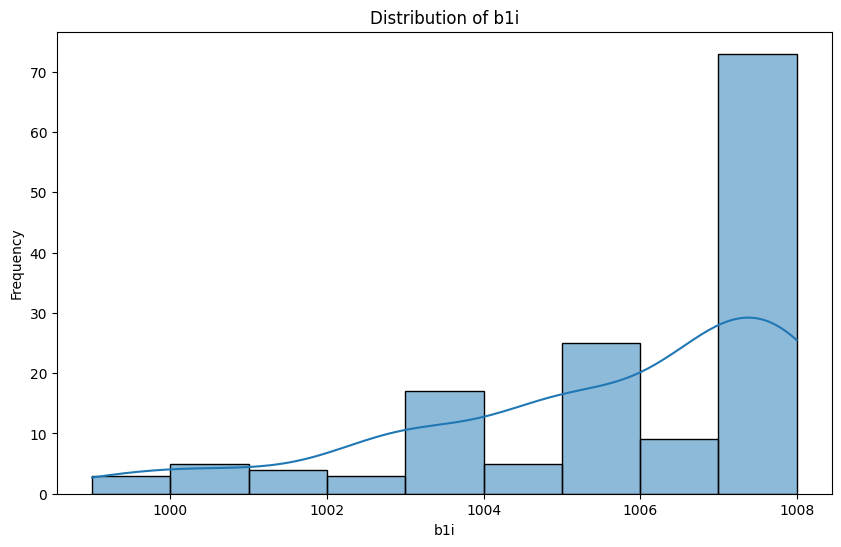


Analysis for column: p1a
Descriptive Statistics:
count    144.000000
mean       7.813471
std        2.470170
min        2.969830
25%        5.614230
50%        7.926220
75%        9.630692
max       12.194850
Name: p1a, dtype: float64


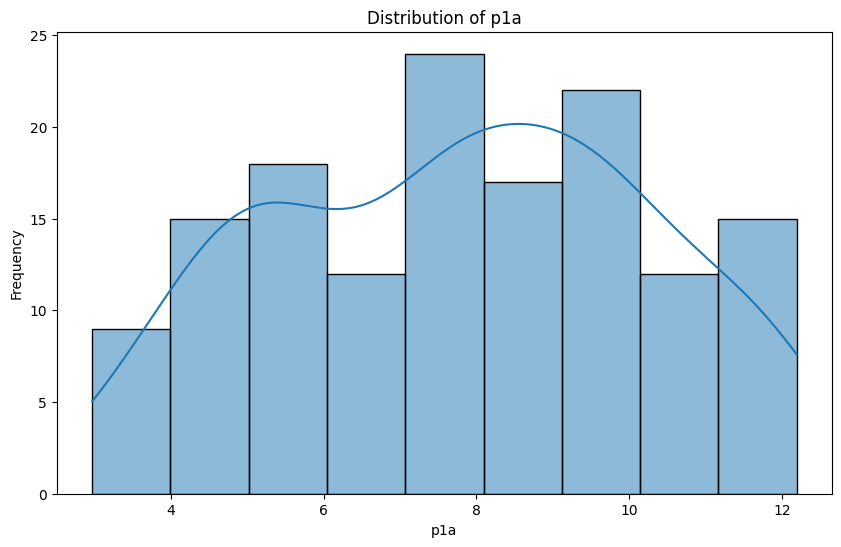


Analysis for column: p1x
Descriptive Statistics:
count    144.000000
mean       9.668006
std        2.836815
min        4.125250
25%        6.818938
50%       10.016975
75%       12.022913
max       15.037550
Name: p1x, dtype: float64


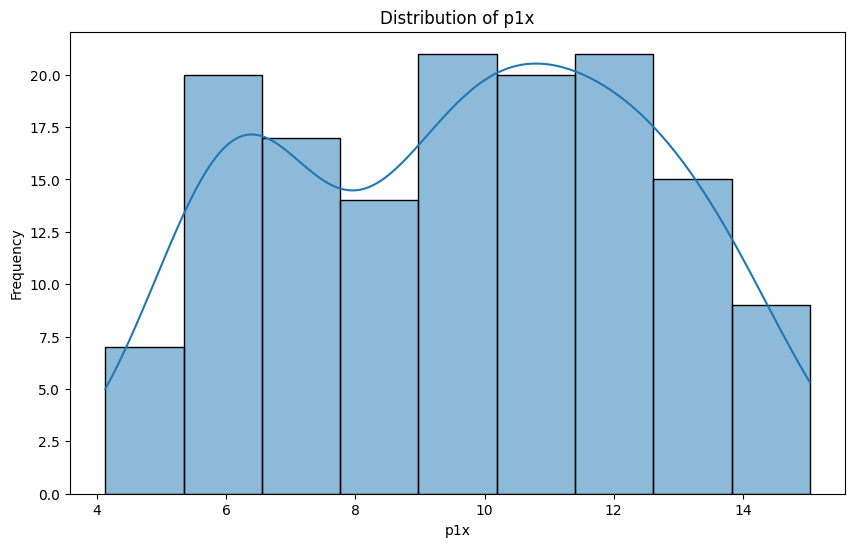


Analysis for column: p1i
Descriptive Statistics:
count    144.000000
mean       5.486422
std        1.971937
min        1.465950
25%        4.033550
50%        5.431975
75%        6.933563
max        9.902350
Name: p1i, dtype: float64


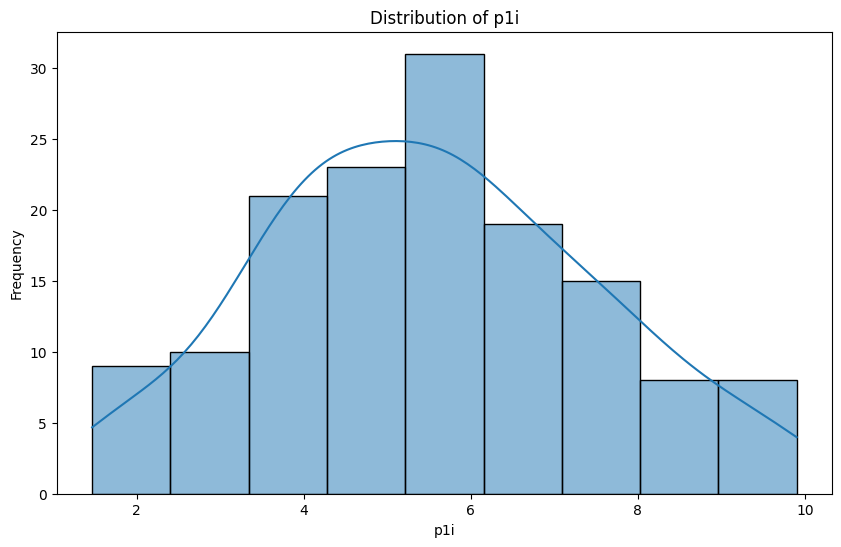


Analysis for column: p1s
Descriptive Statistics:
count    144.000000
mean       0.743759
std        0.210738
min        0.385140
25%        0.596050
50%        0.696920
75%        0.858545
max        1.403010
Name: p1s, dtype: float64


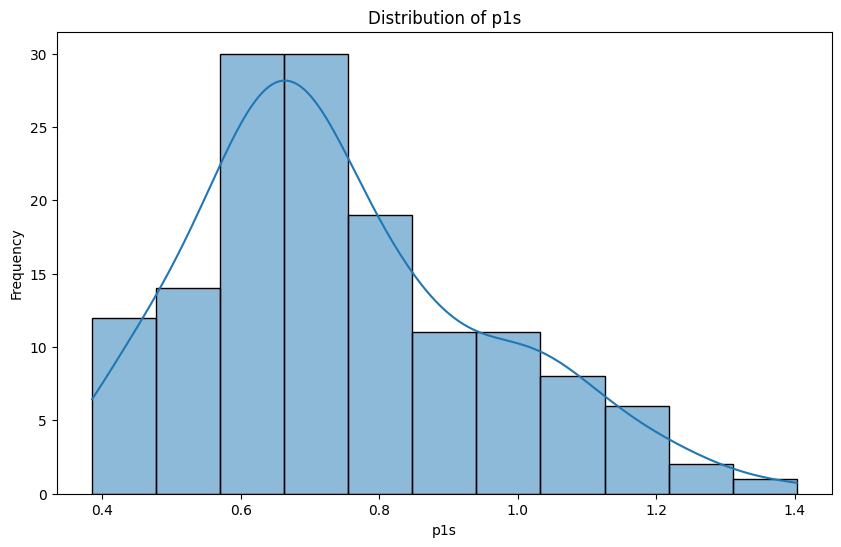


Analysis for column: tia
Descriptive Statistics:
count    144.000000
mean      47.395833
std        2.421404
min       44.000000
25%       45.000000
50%       48.000000
75%       50.000000
max       51.000000
Name: tia, dtype: float64


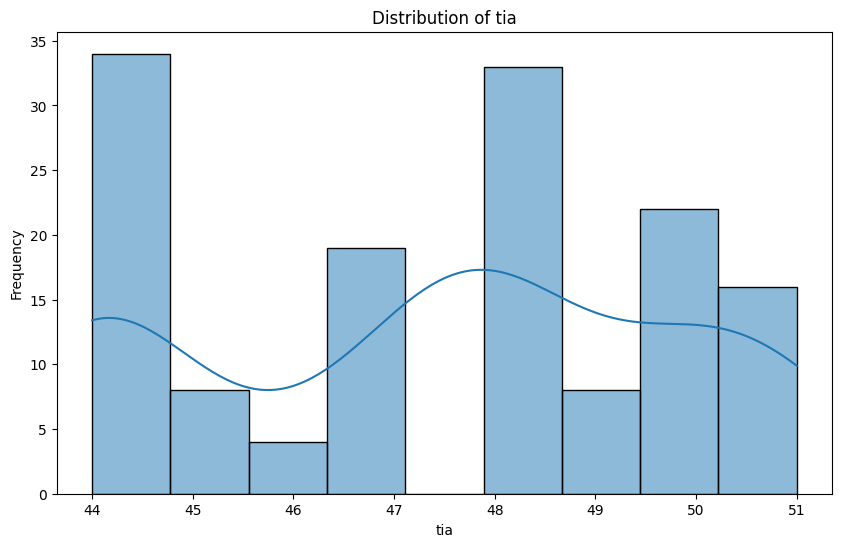


Analysis for column: tix
Descriptive Statistics:
count    144.000000
mean      47.465278
std        2.440661
min       44.000000
25%       45.000000
50%       48.000000
75%       50.000000
max       51.000000
Name: tix, dtype: float64


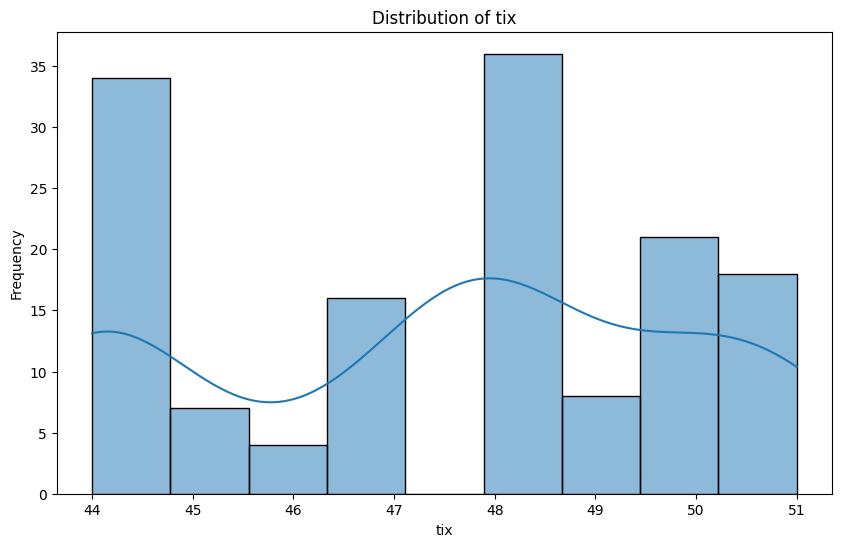


Analysis for column: tii
Descriptive Statistics:
count    144.000000
mean      47.347222
std        2.401397
min       44.000000
25%       45.000000
50%       48.000000
75%       50.000000
max       51.000000
Name: tii, dtype: float64


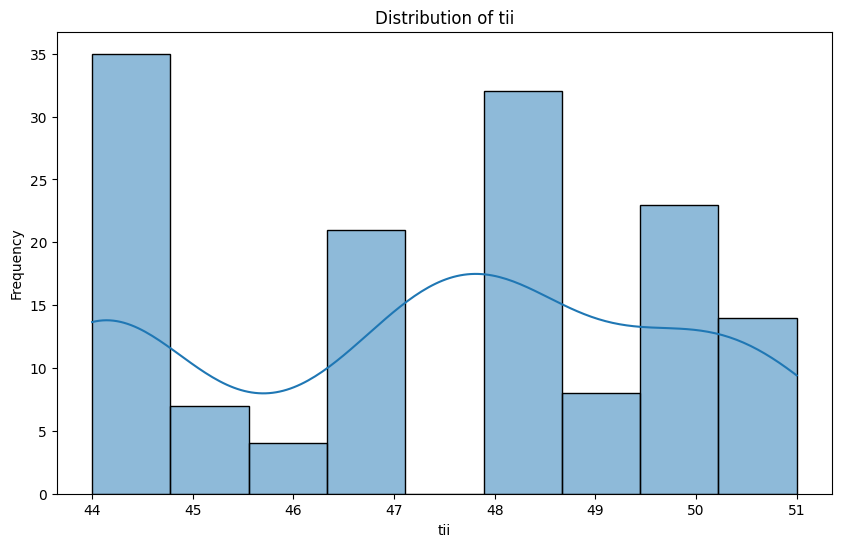


Analysis for column: vxa
Descriptive Statistics:
count    144.000000
mean     130.090278
std        5.139880
min      125.000000
25%      126.000000
50%      127.000000
75%      137.000000
max      138.000000
Name: vxa, dtype: float64


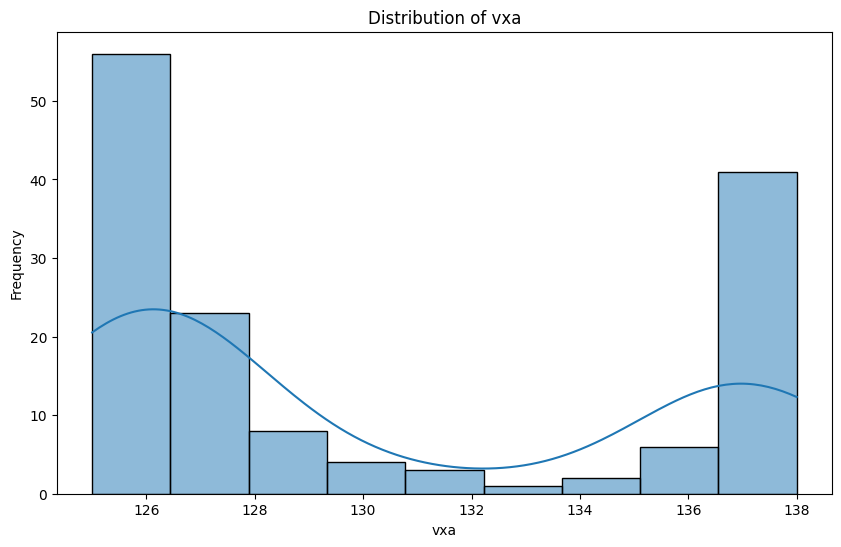


Analysis for column: vxx
Descriptive Statistics:
count    144.000000
mean     130.423611
std        5.422796
min      125.000000
25%      126.000000
50%      127.000000
75%      137.000000
max      140.000000
Name: vxx, dtype: float64


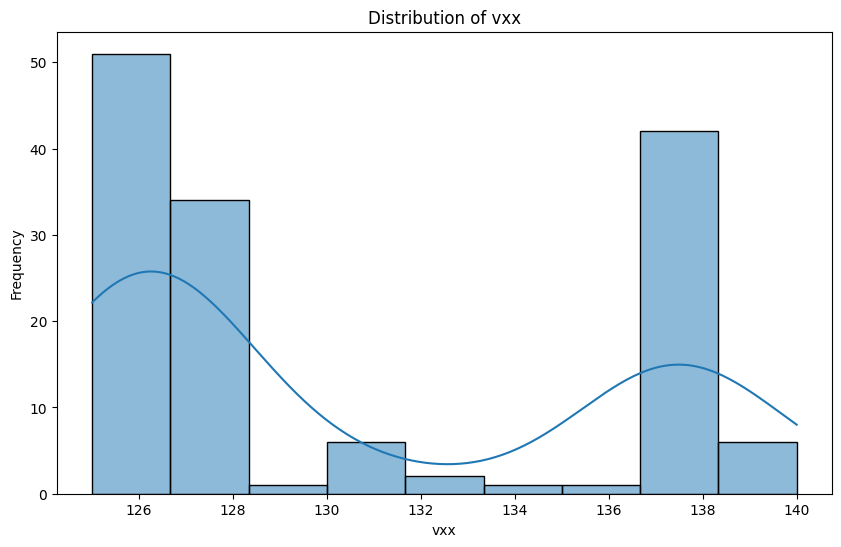


Analysis for column: vxi
Descriptive Statistics:
count    144.000000
mean     129.701389
std        4.867589
min      124.000000
25%      126.000000
50%      127.000000
75%      136.000000
max      138.000000
Name: vxi, dtype: float64


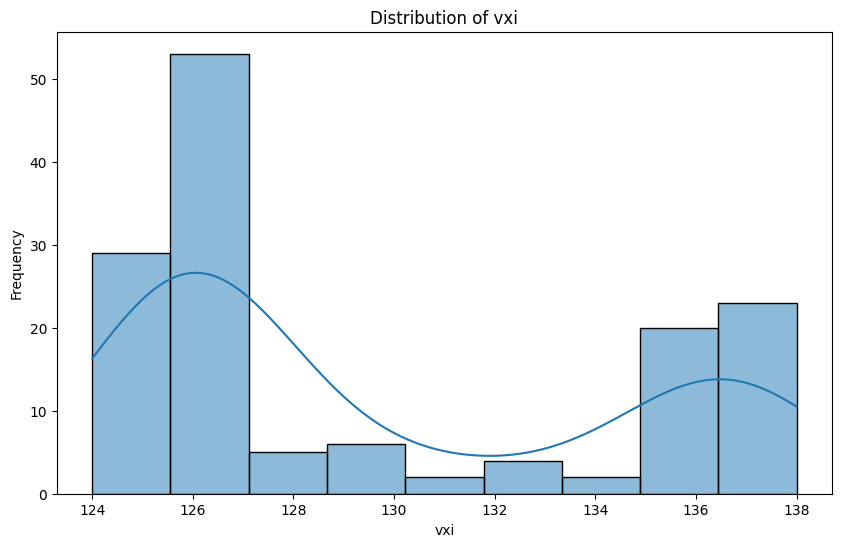


Analysis for column: bla
Descriptive Statistics:
count    144.0
mean      83.0
std        0.0
min       83.0
25%       83.0
50%       83.0
75%       83.0
max       83.0
Name: bla, dtype: float64


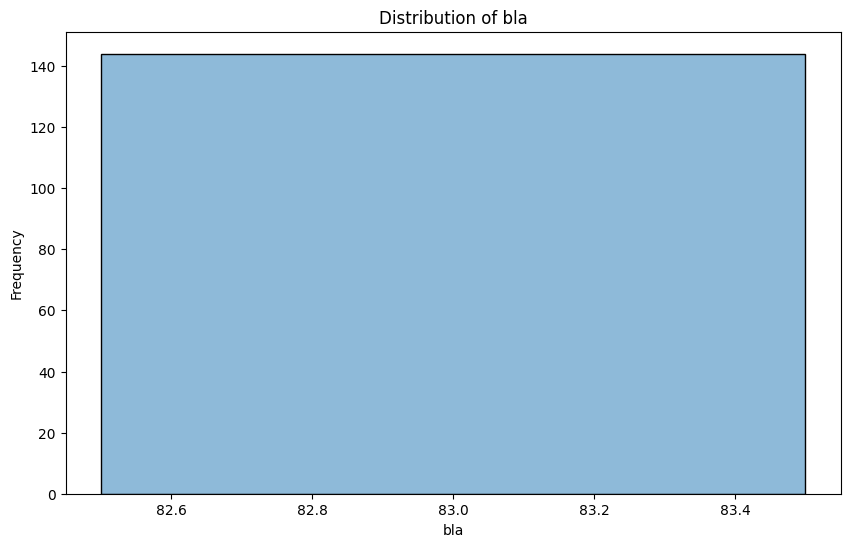


Analysis for column: blx
Descriptive Statistics:
count    144.0
mean      83.0
std        0.0
min       83.0
25%       83.0
50%       83.0
75%       83.0
max       83.0
Name: blx, dtype: float64


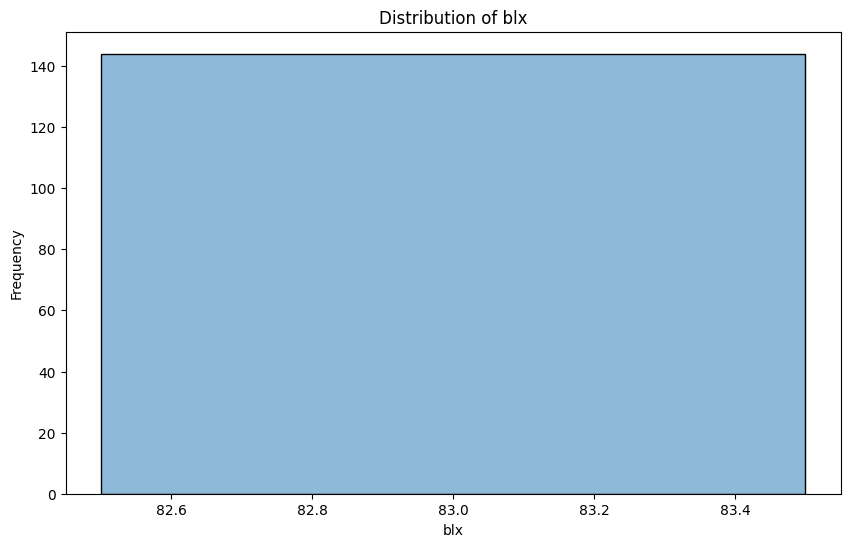


Analysis for column: bli
Descriptive Statistics:
count    144.000000
mean      82.986111
std        0.117438
min       82.000000
25%       83.000000
50%       83.000000
75%       83.000000
max       83.000000
Name: bli, dtype: float64


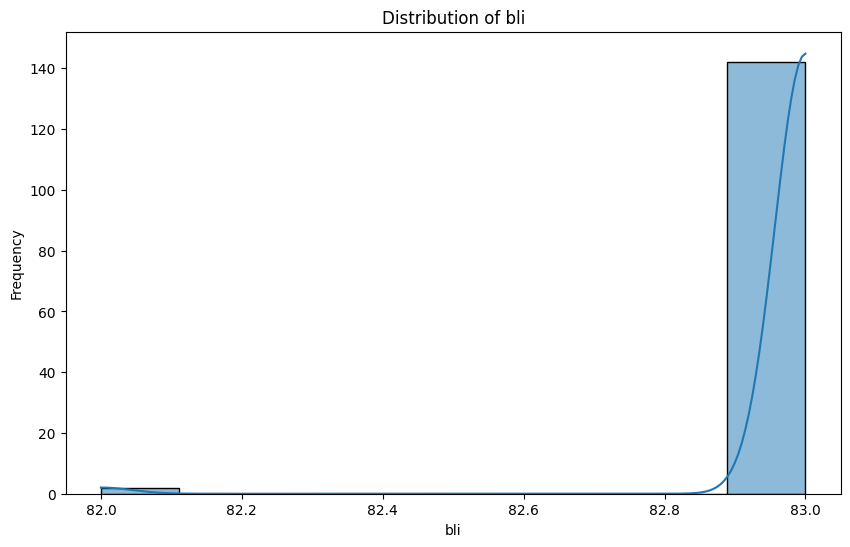


Analysis for column: bra
Descriptive Statistics:
count    144.0
mean      83.0
std        0.0
min       83.0
25%       83.0
50%       83.0
75%       83.0
max       83.0
Name: bra, dtype: float64


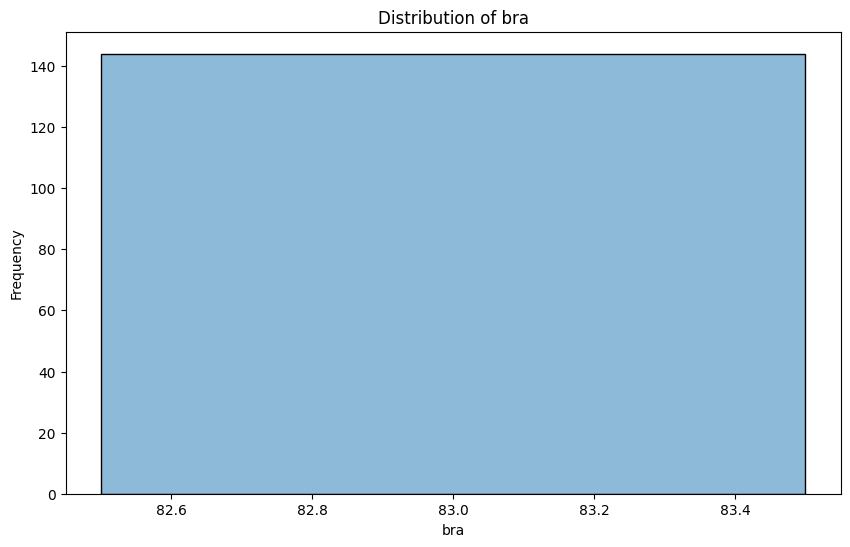


Analysis for column: brx
Descriptive Statistics:
count    144.0
mean      83.0
std        0.0
min       83.0
25%       83.0
50%       83.0
75%       83.0
max       83.0
Name: brx, dtype: float64


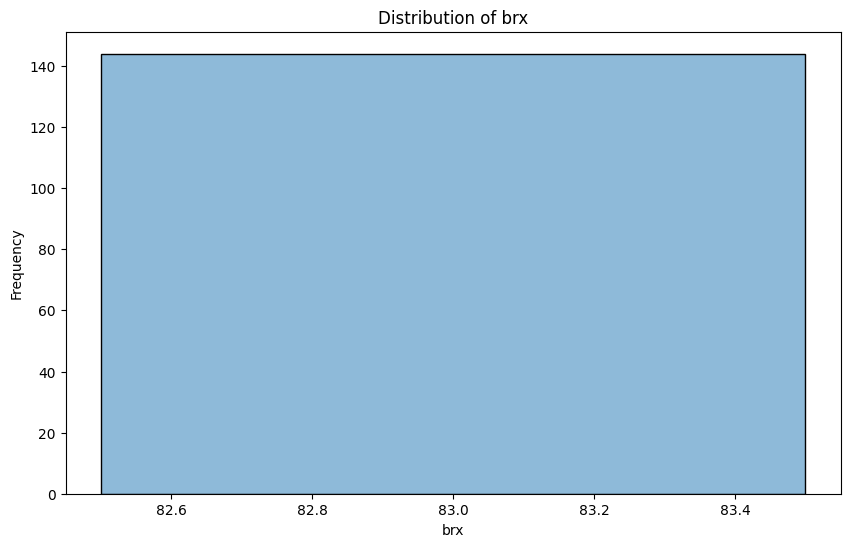


Analysis for column: bri
Descriptive Statistics:
count    144.0
mean      83.0
std        0.0
min       83.0
25%       83.0
50%       83.0
75%       83.0
max       83.0
Name: bri, dtype: float64


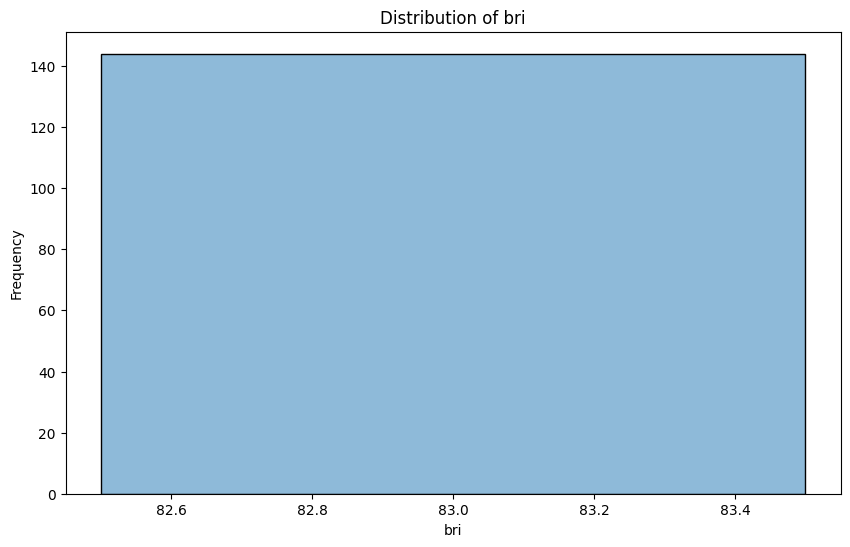

In [5]:
# Perform Statistical data analysis for each column
for column in df.columns:
    if column not in ['date', 'time', 'period']:
        print("\nAnalysis for column:", column)
        
        # Descriptive statistics
        print("Descriptive Statistics:")
        print(df[column].describe())
        
        # Data visualization
        plt.figure(figsize=(10, 6))
        sns.histplot(df[column], kde=True)
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()  

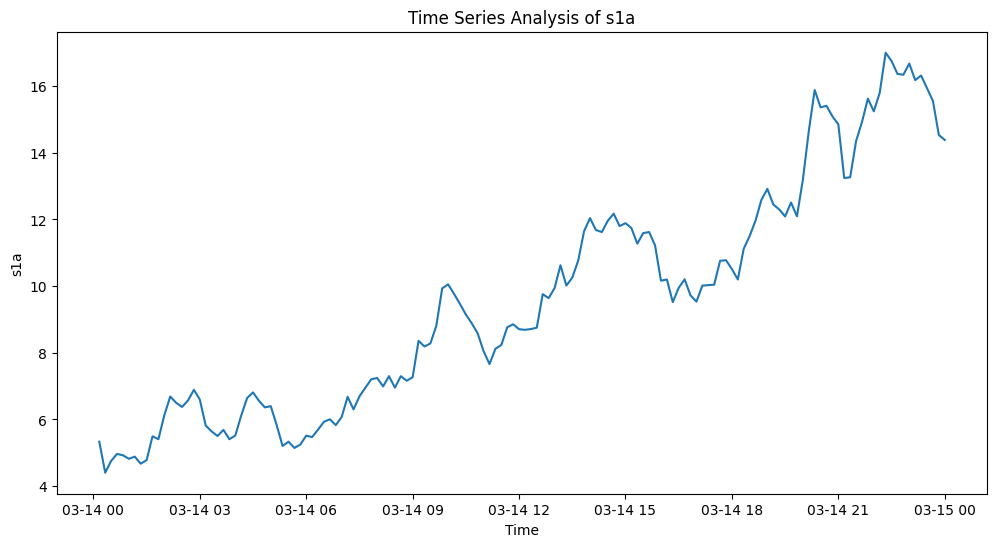

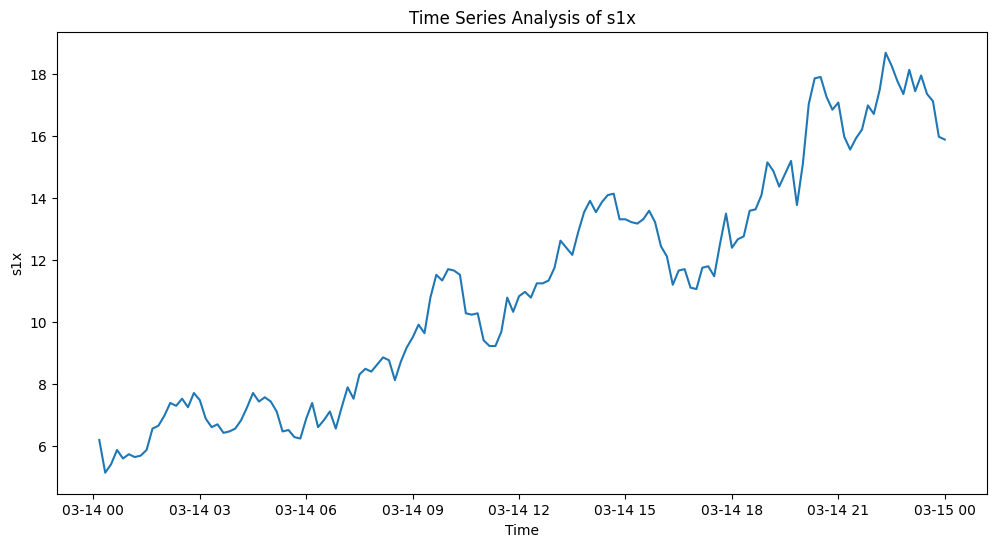

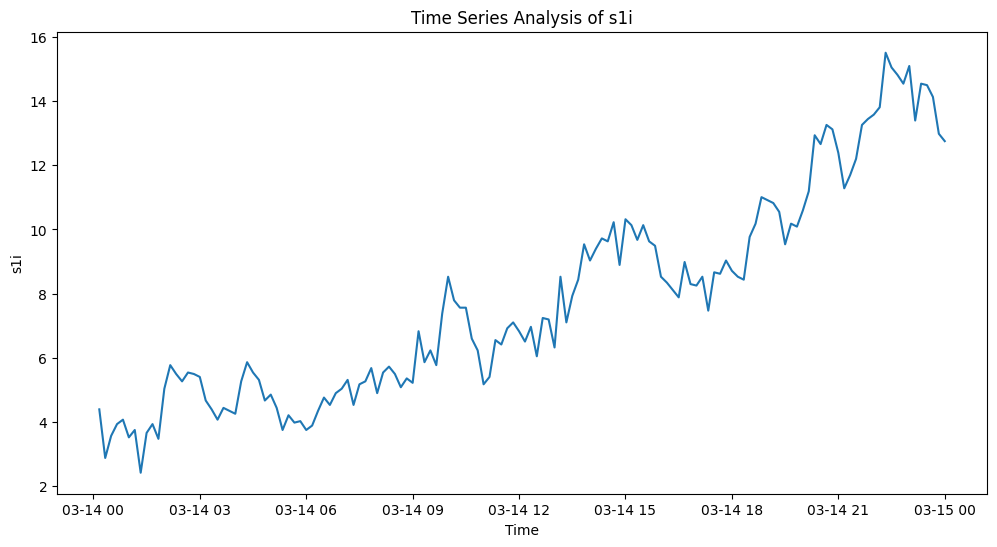

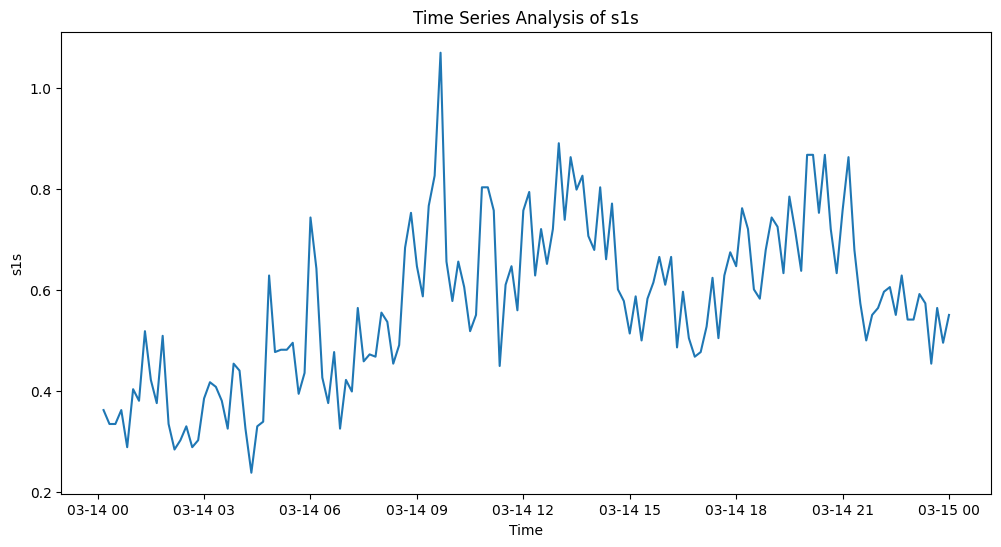

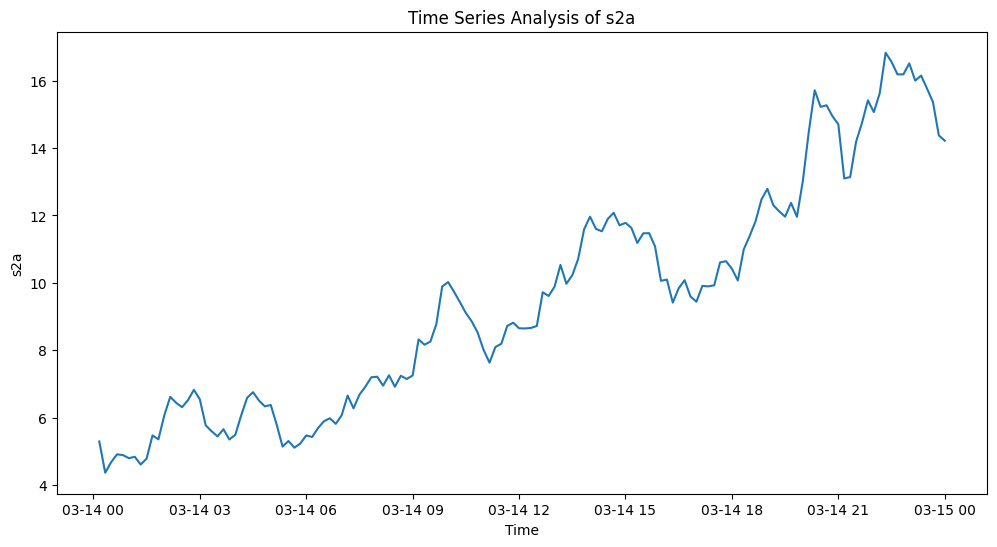

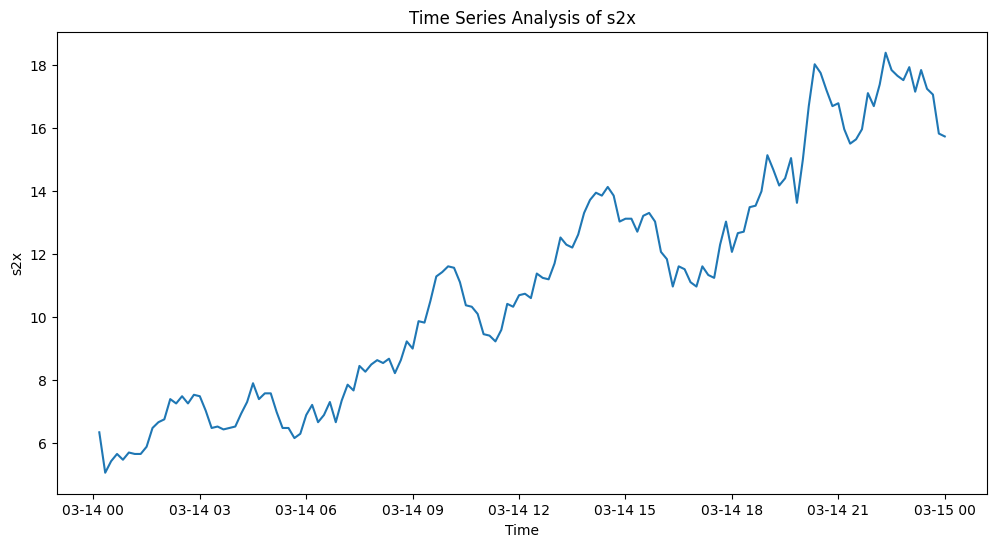

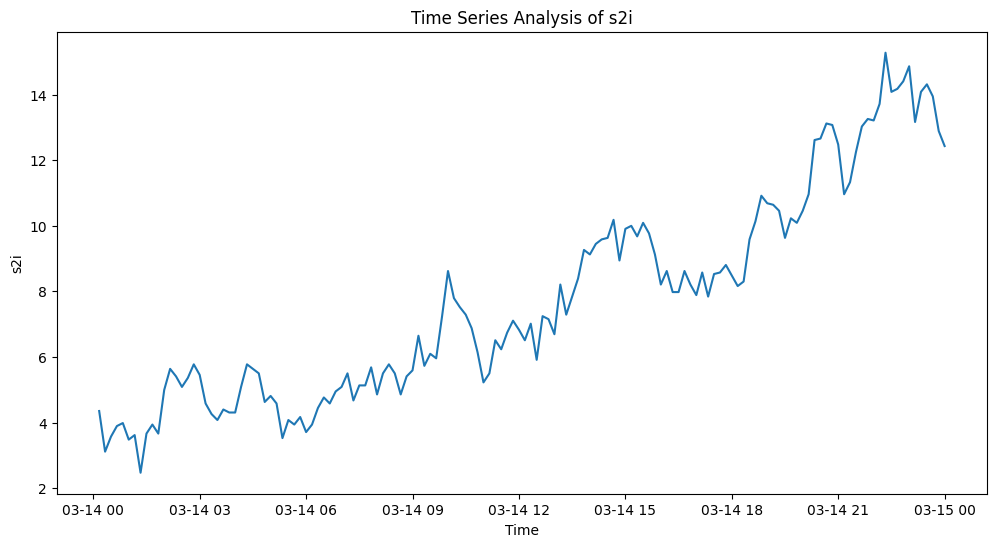

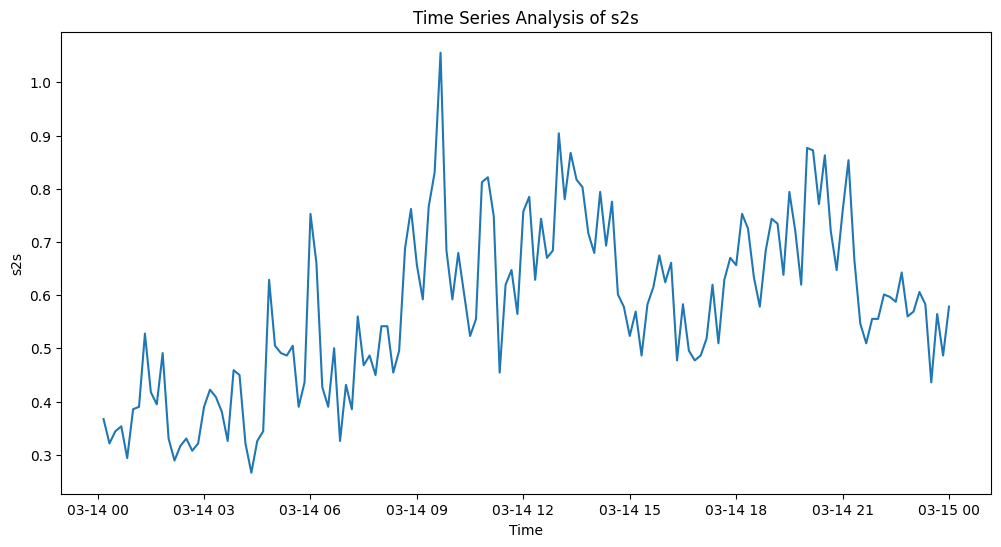

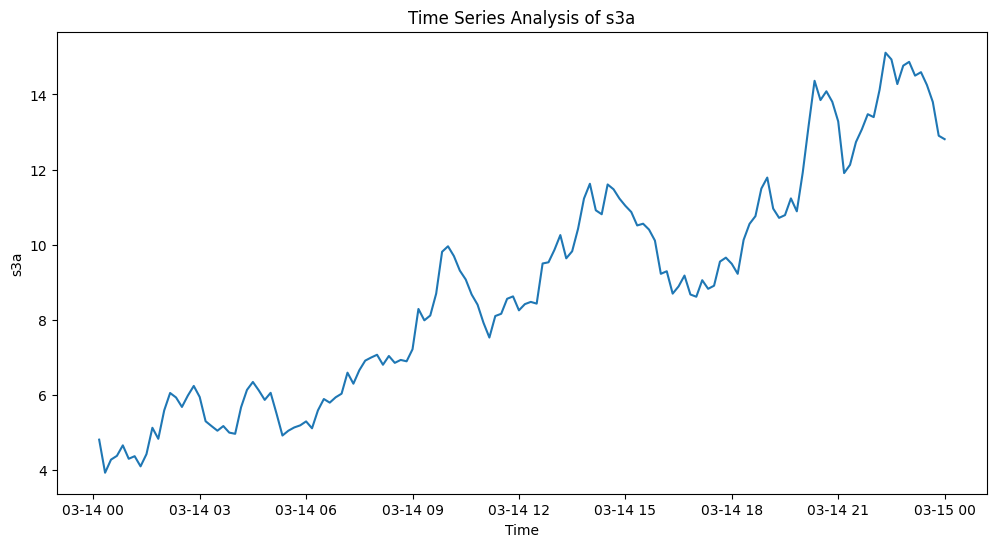

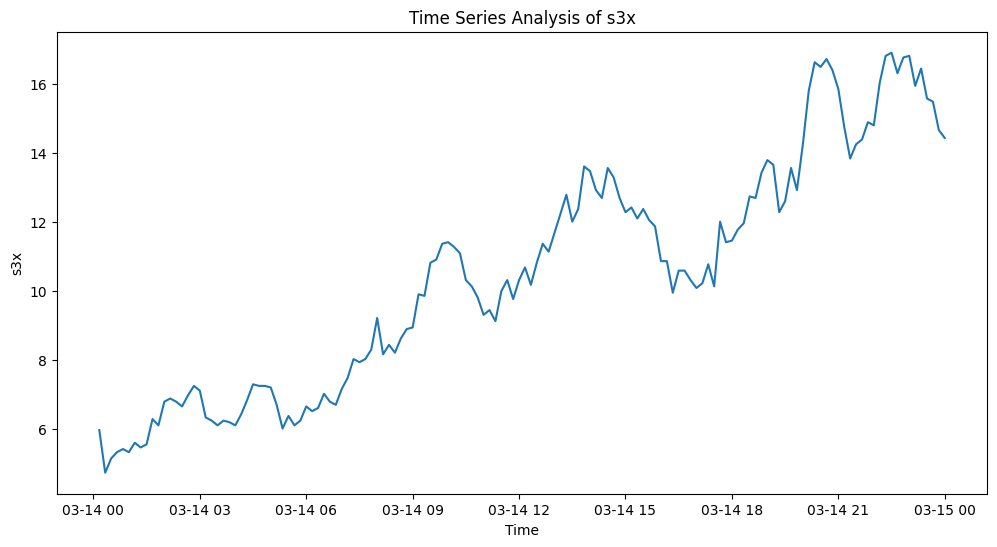

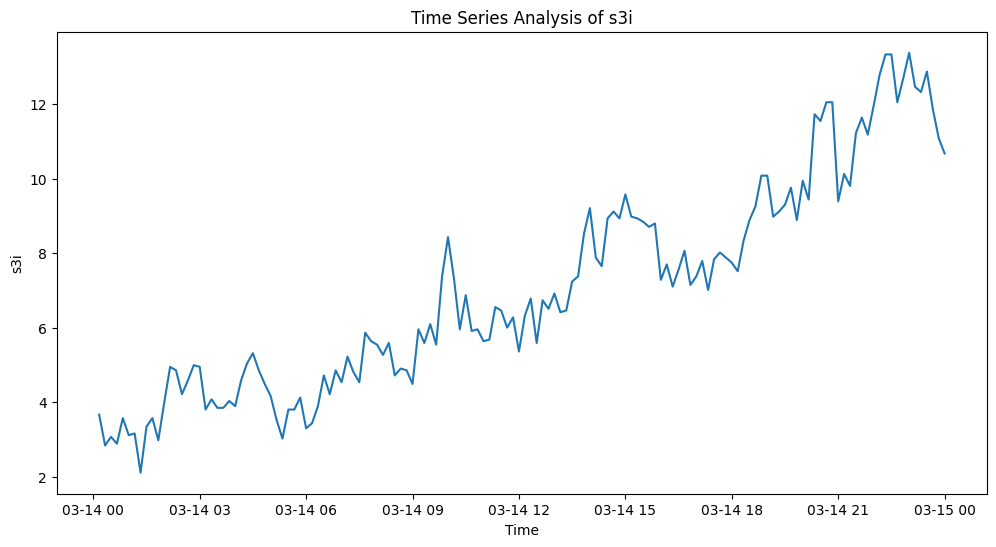

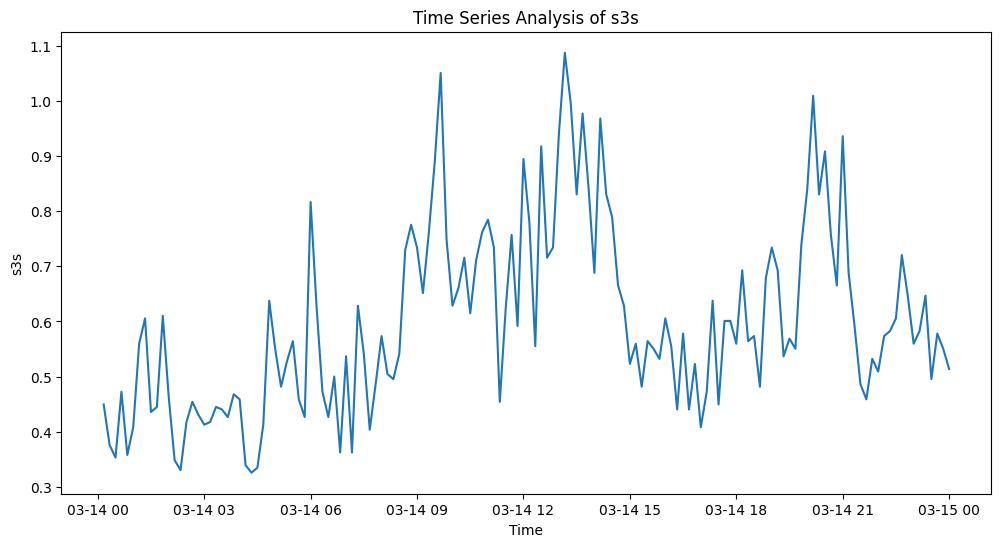

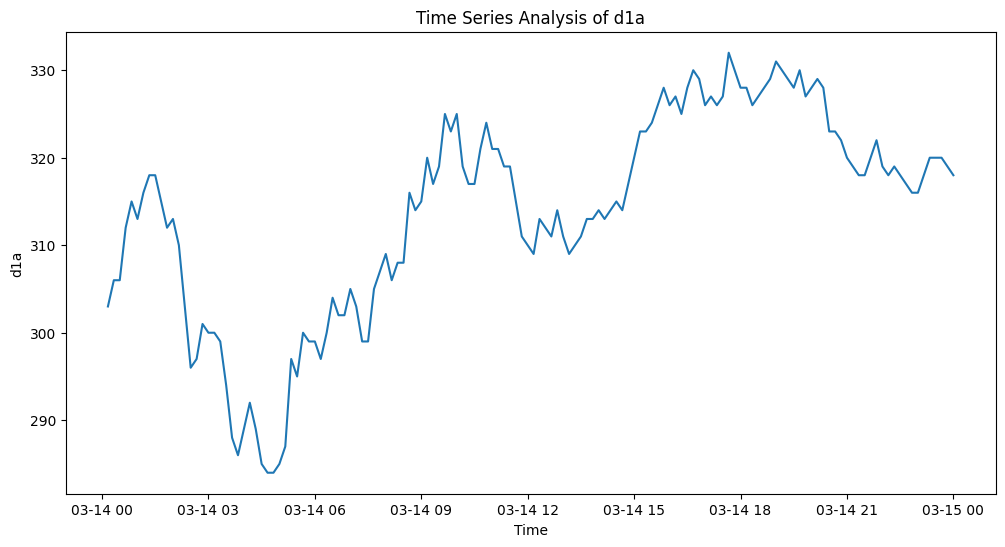

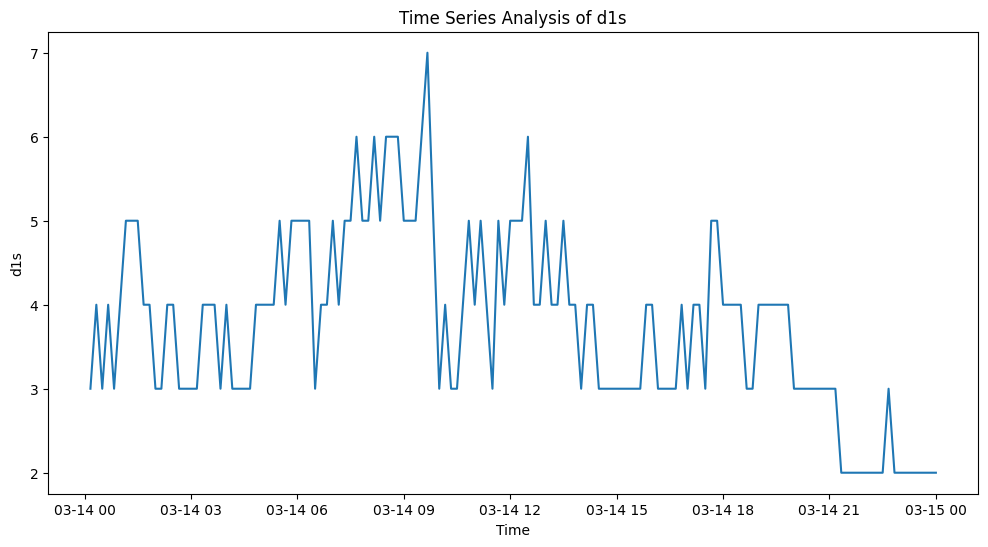

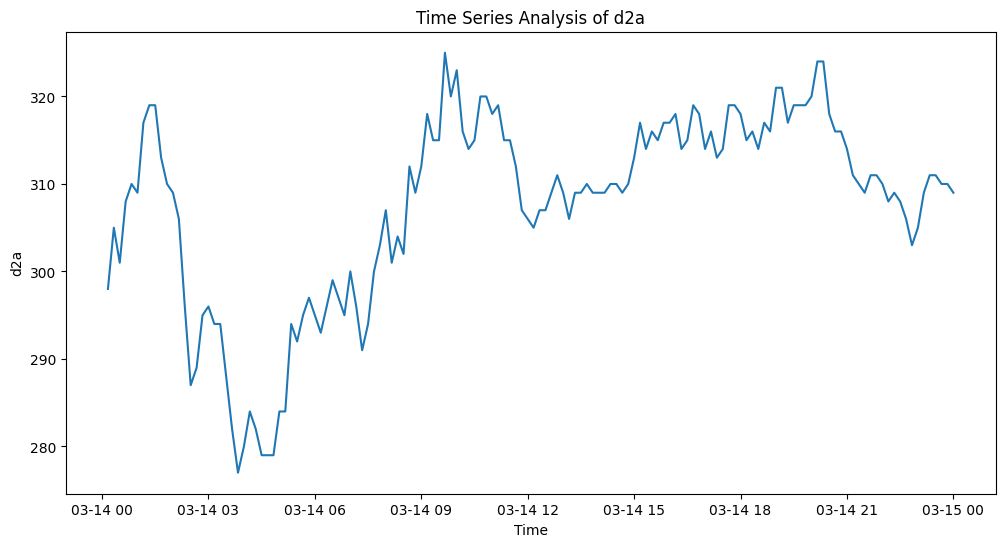

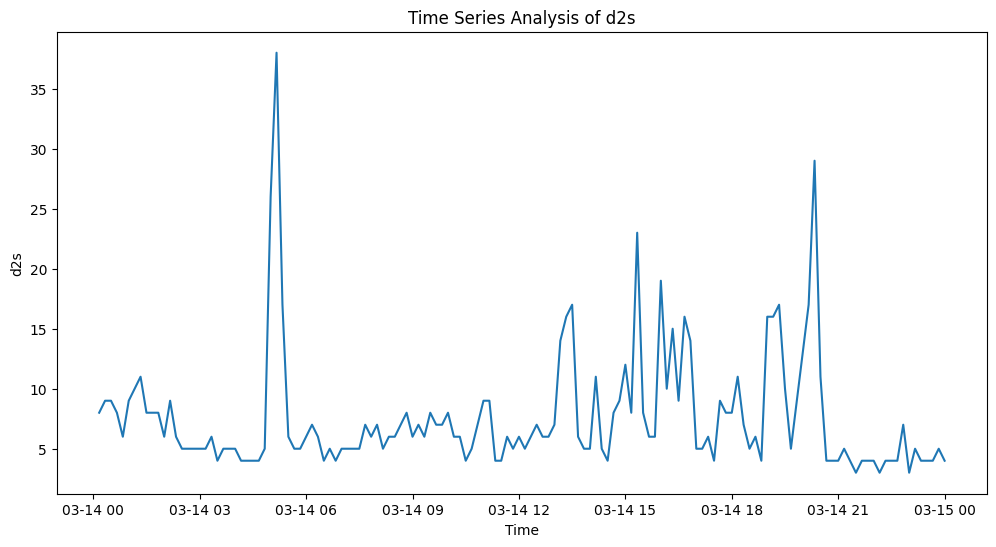

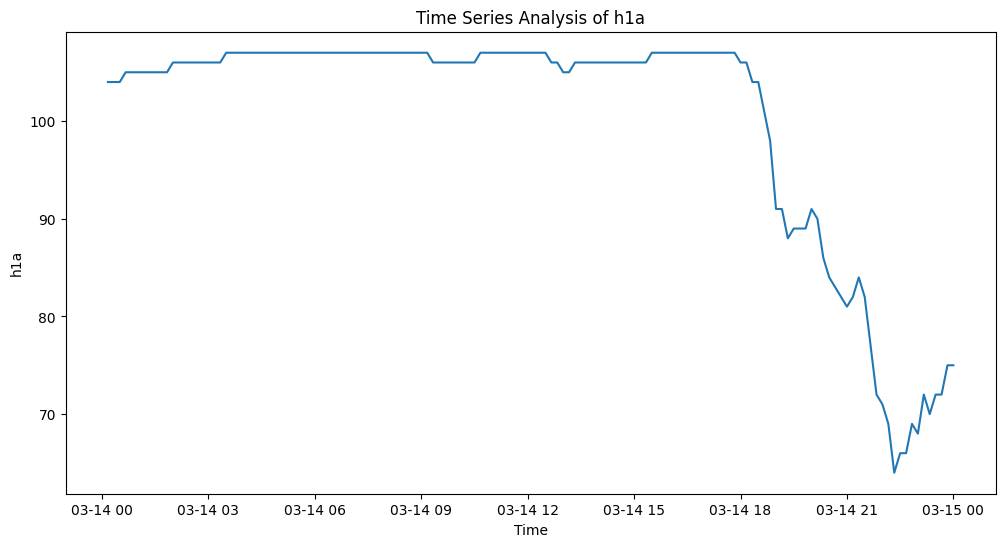

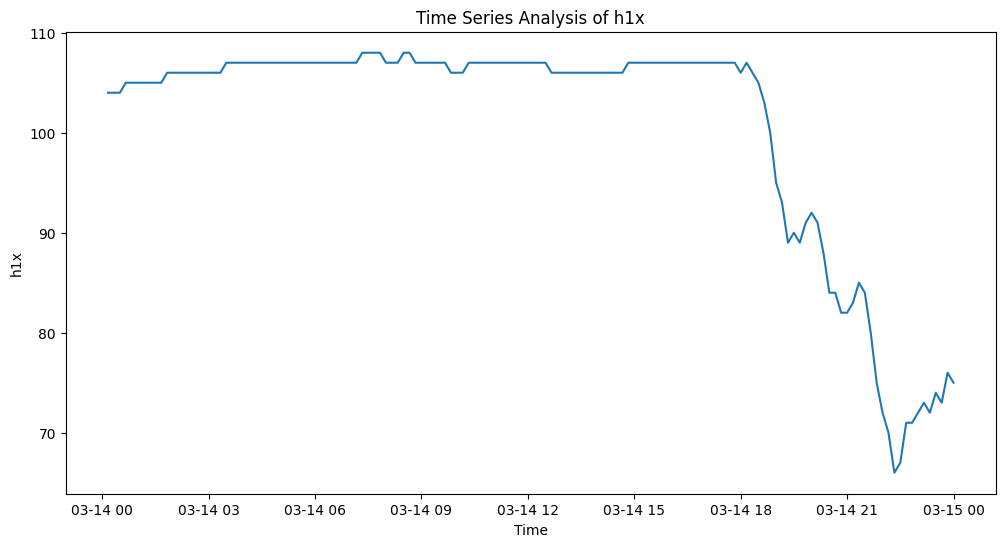

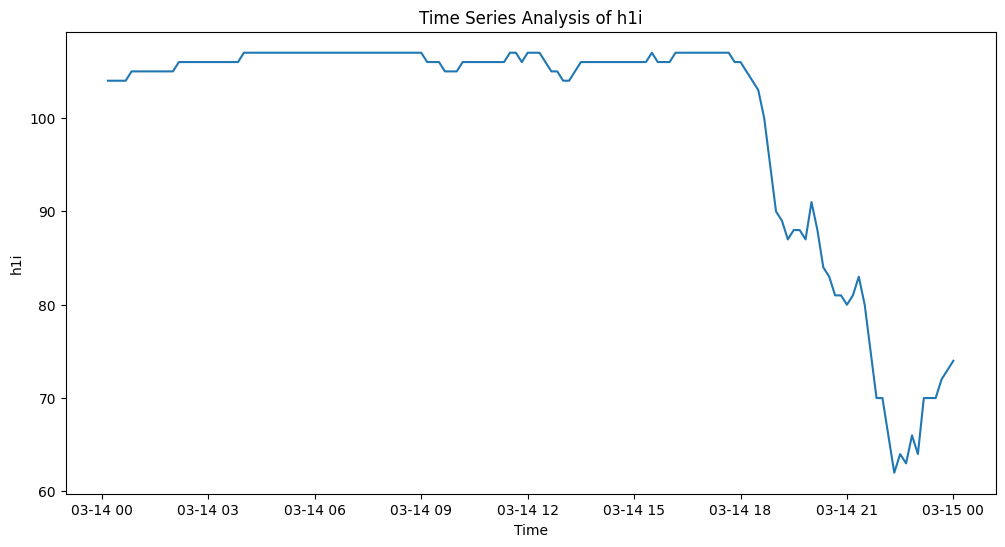

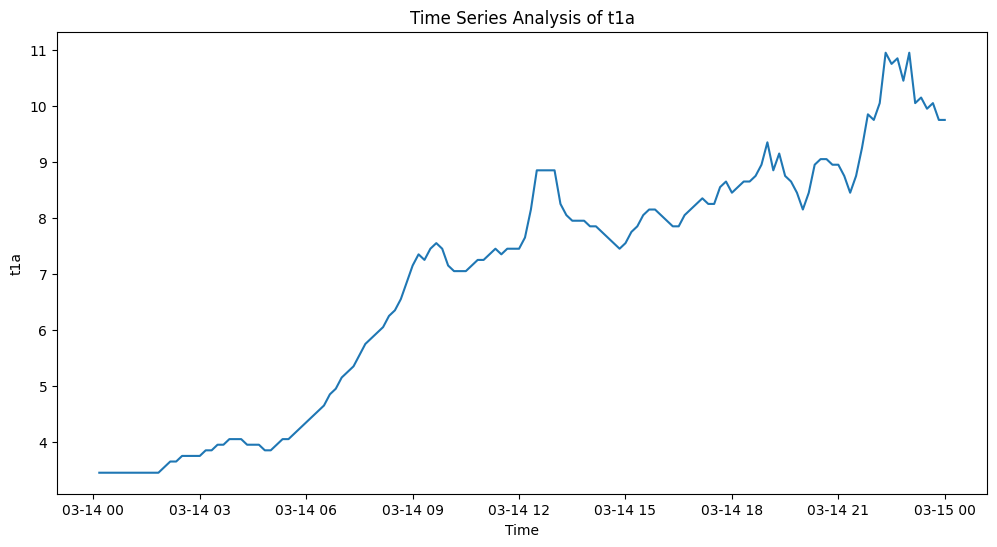

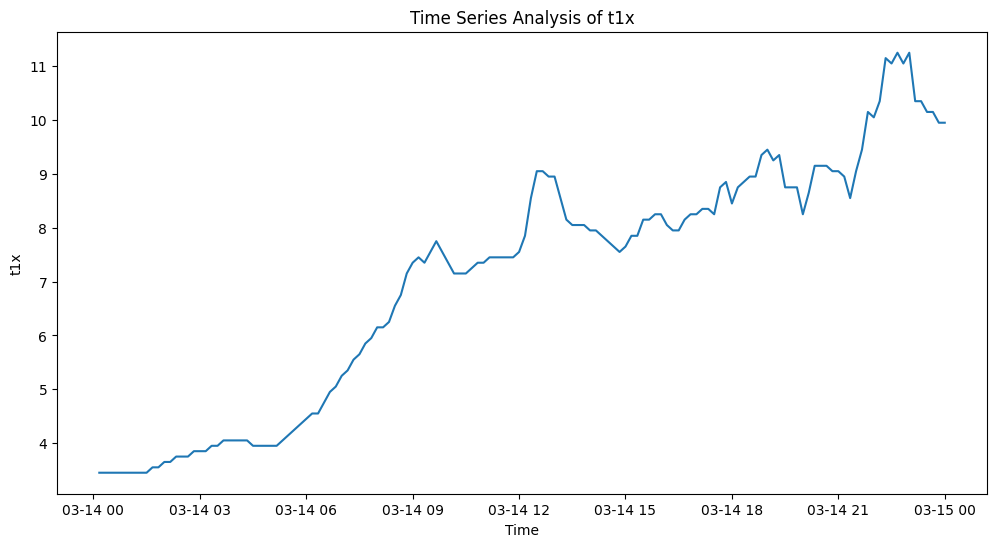

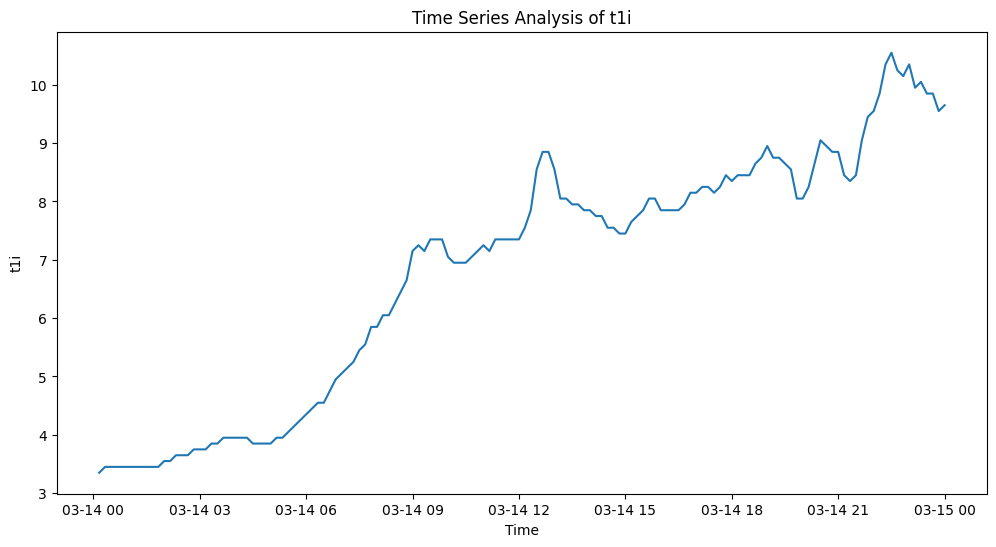

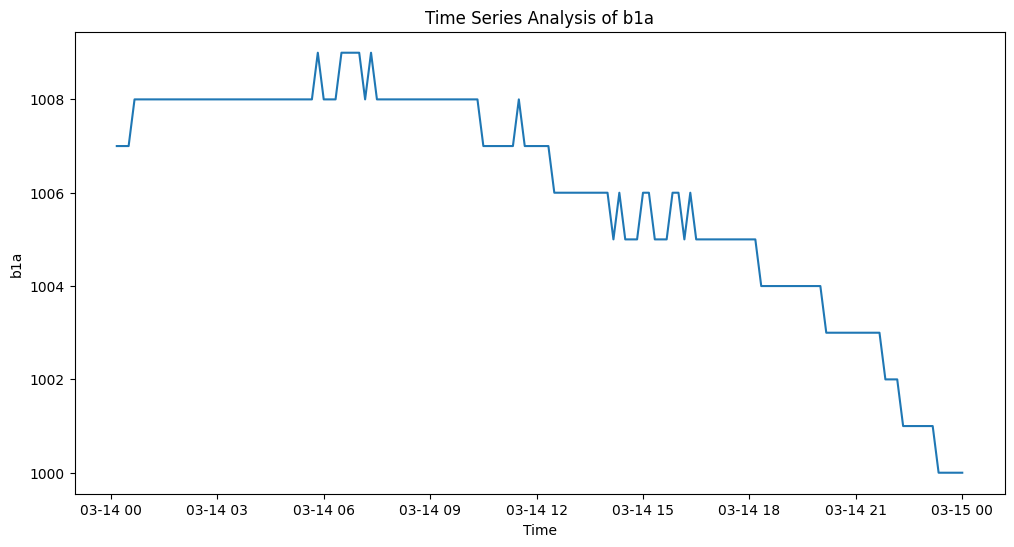

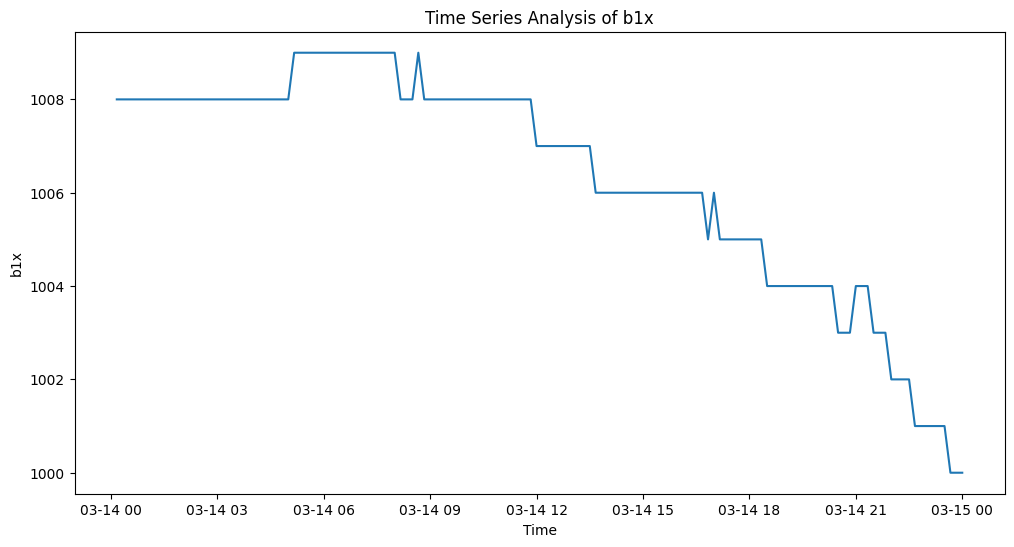

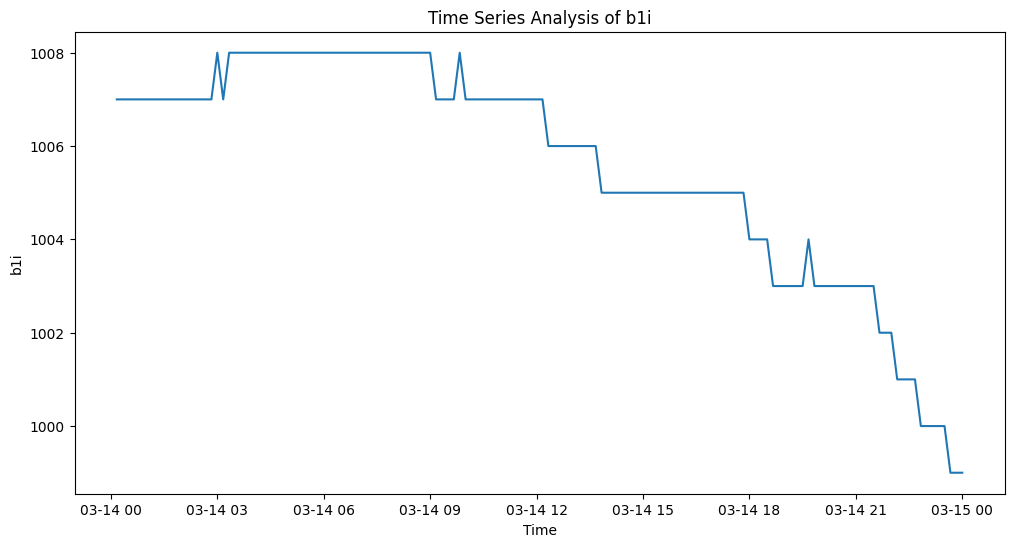

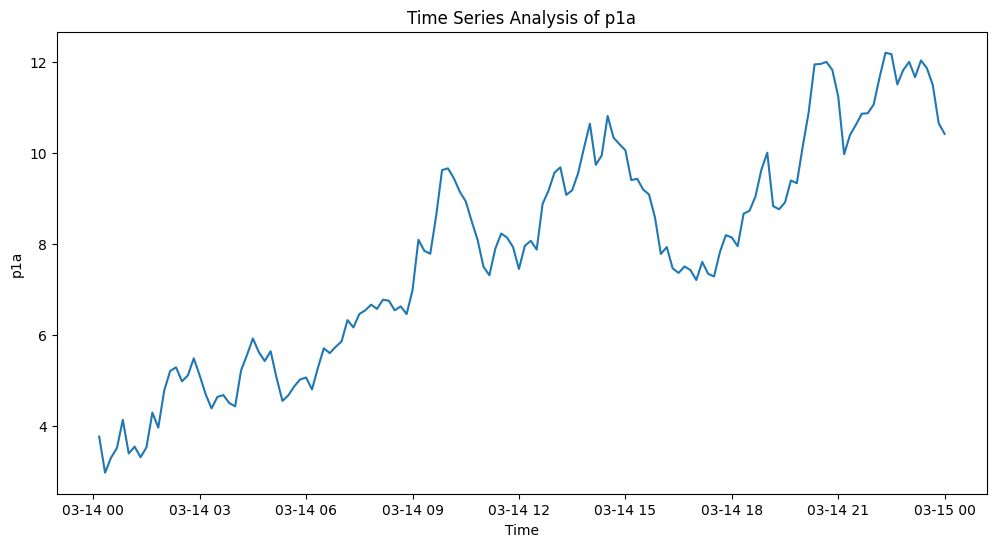

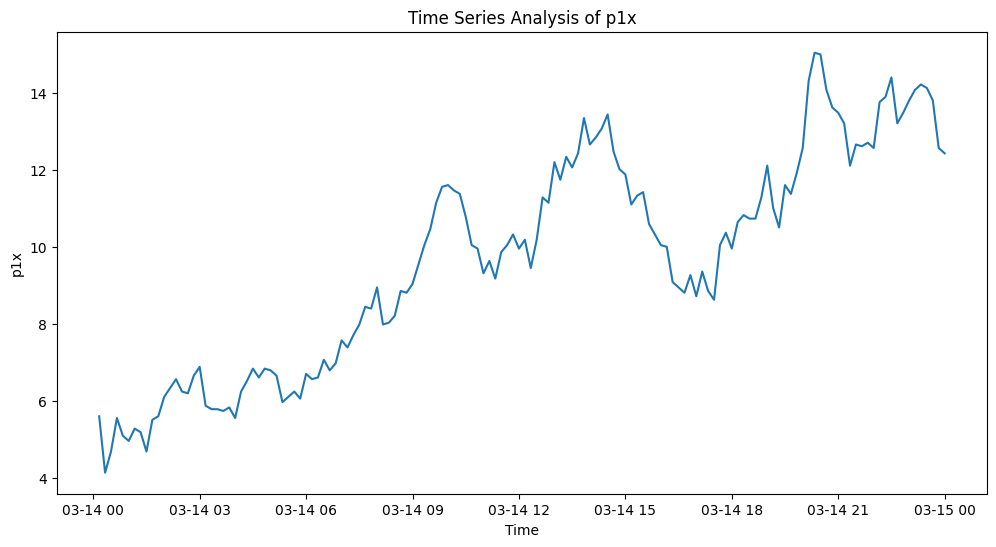

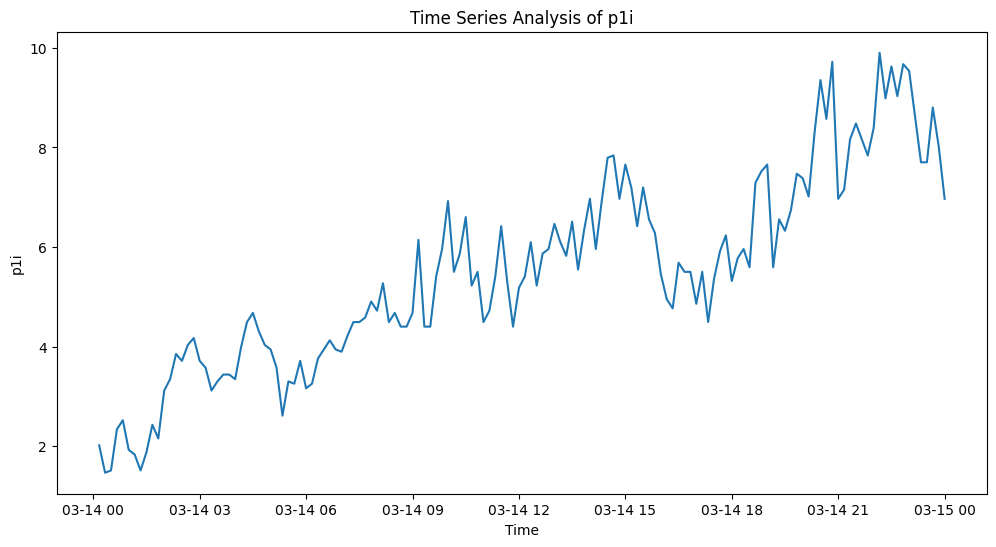

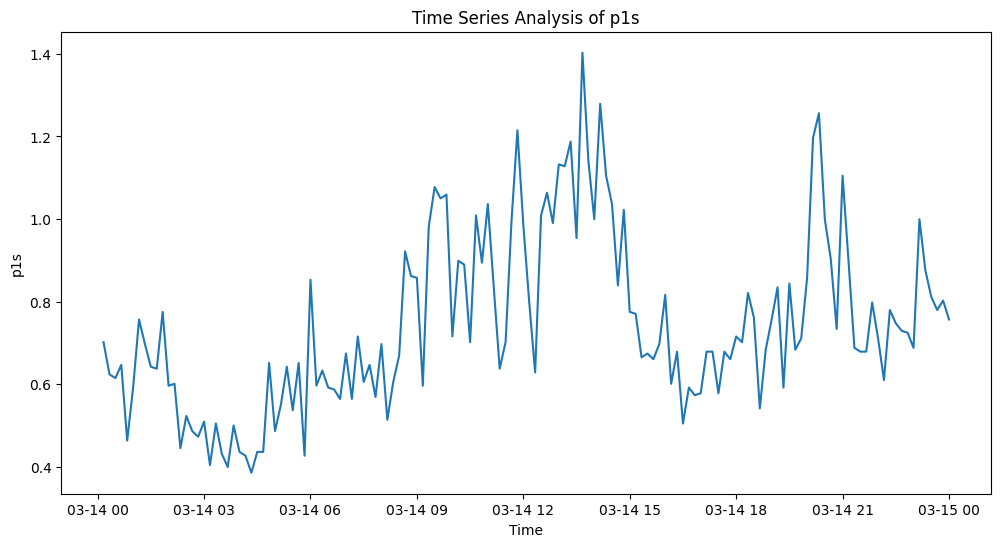

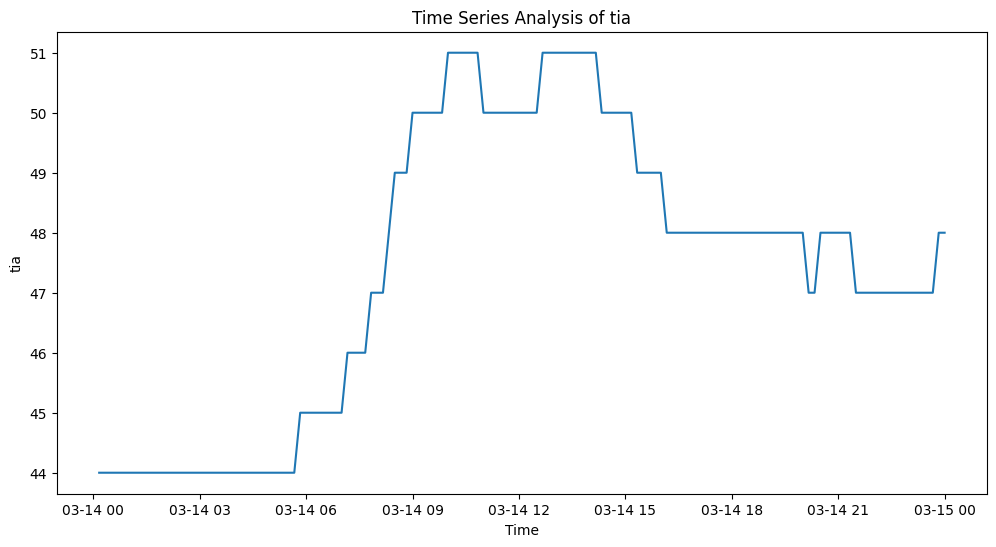

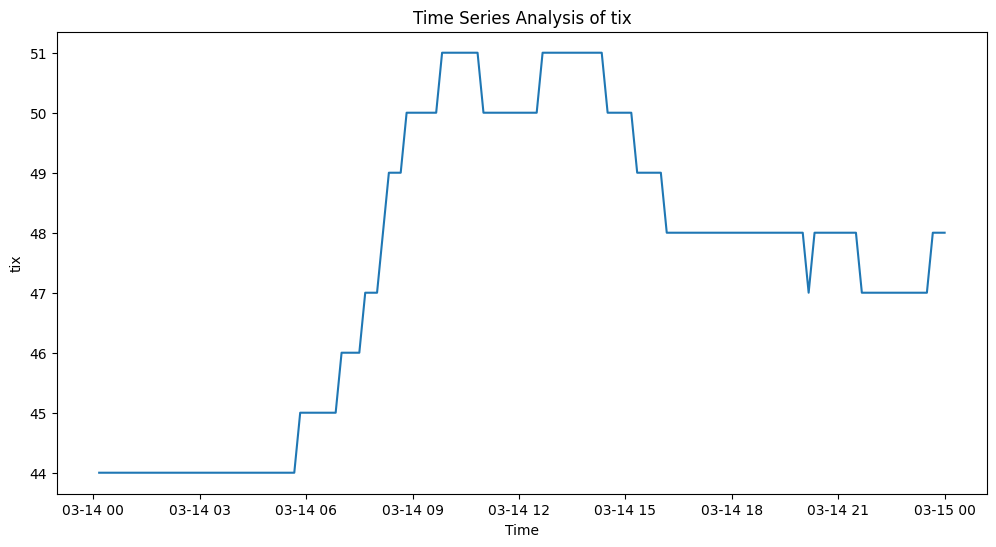

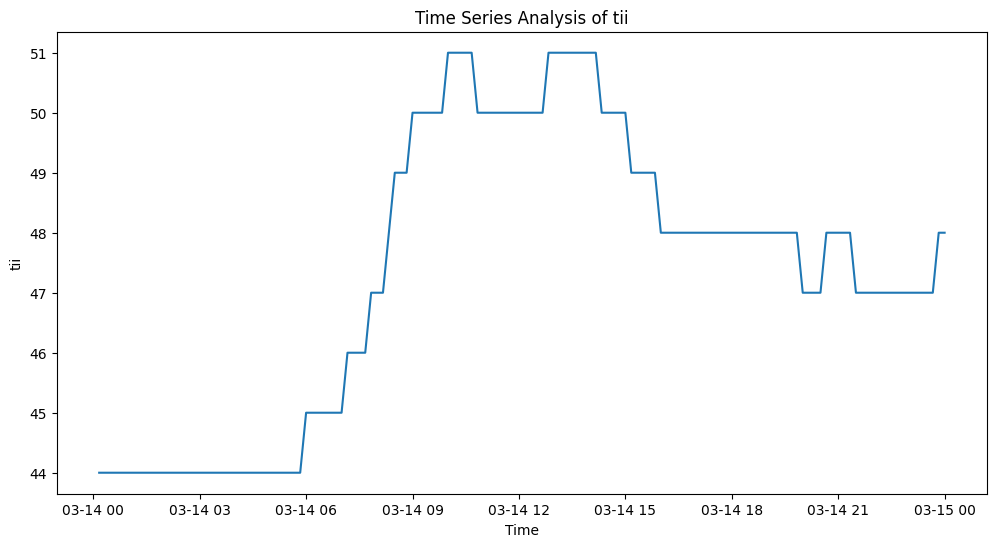

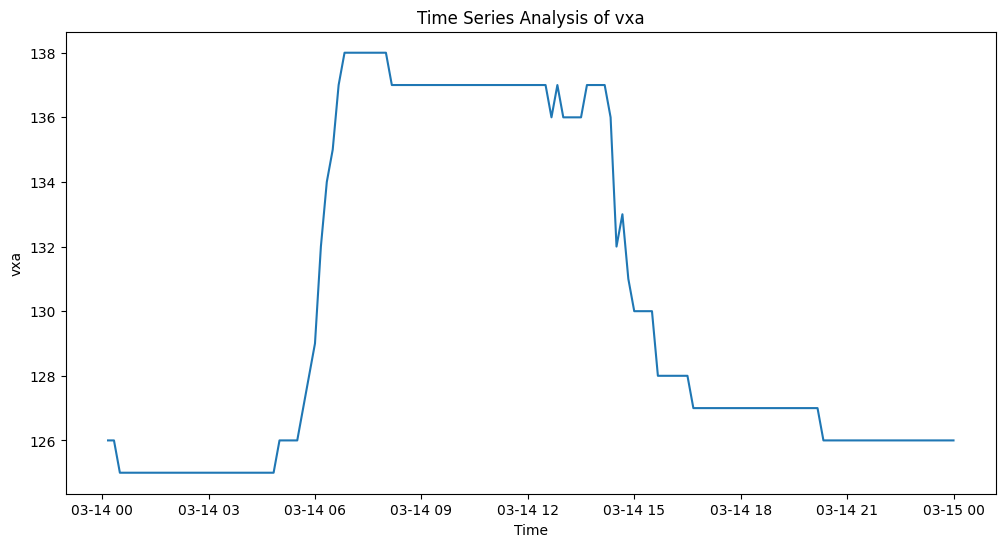

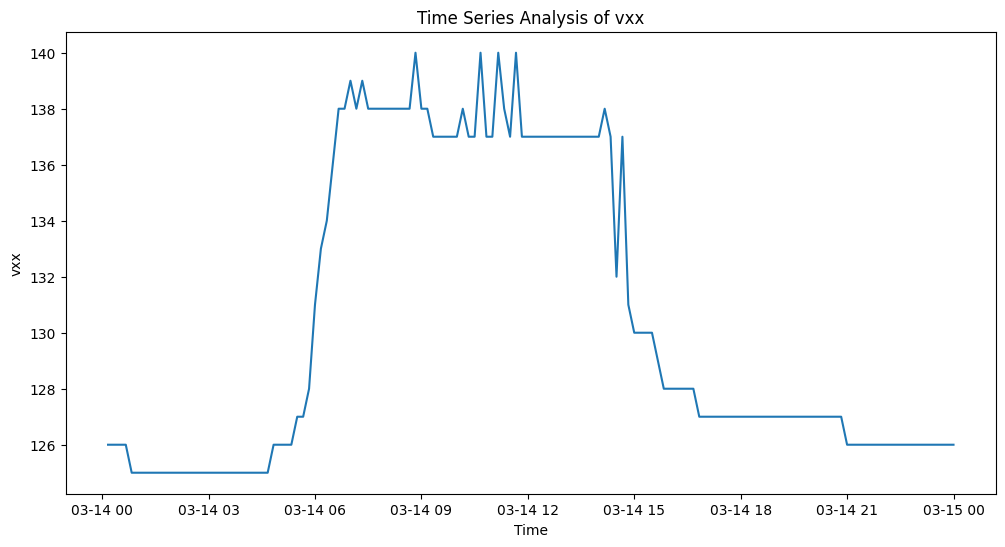

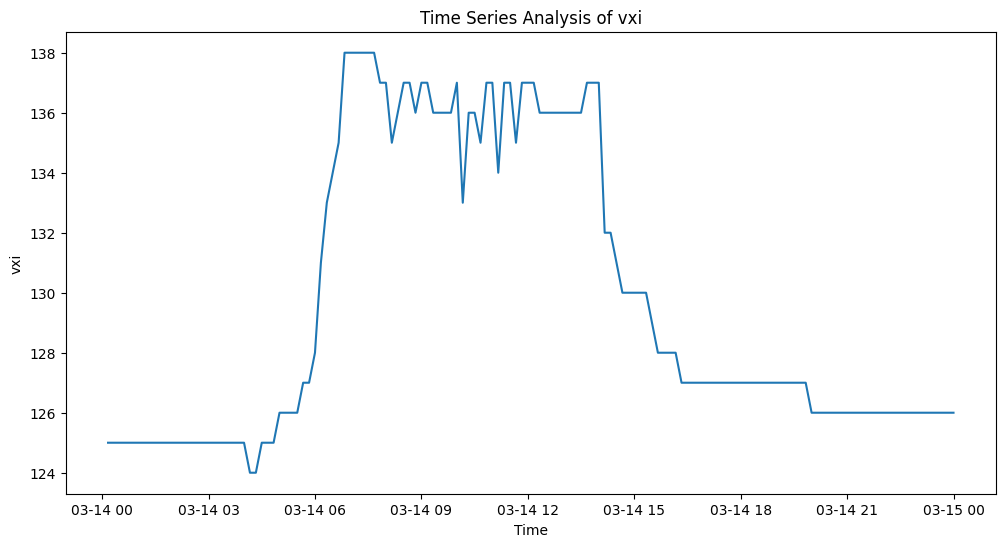

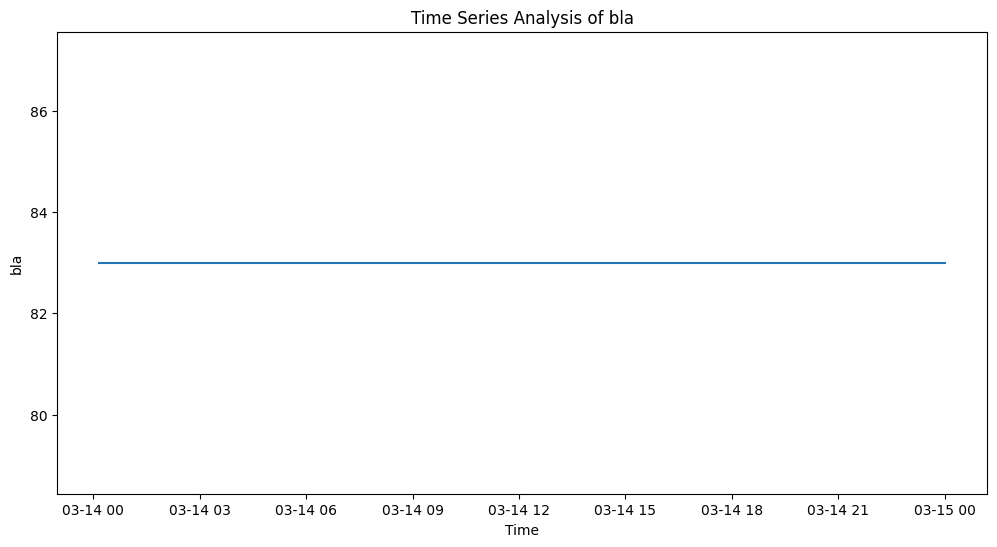

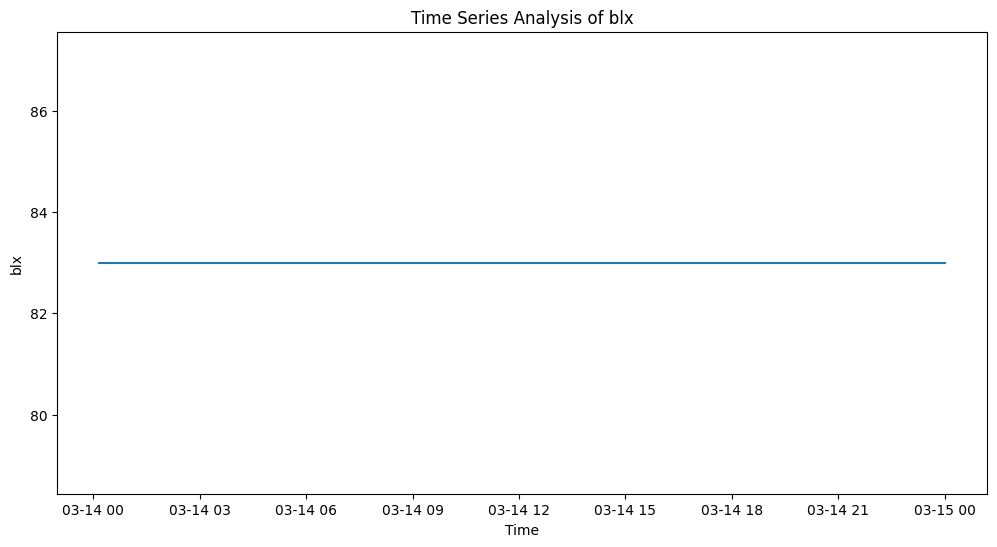

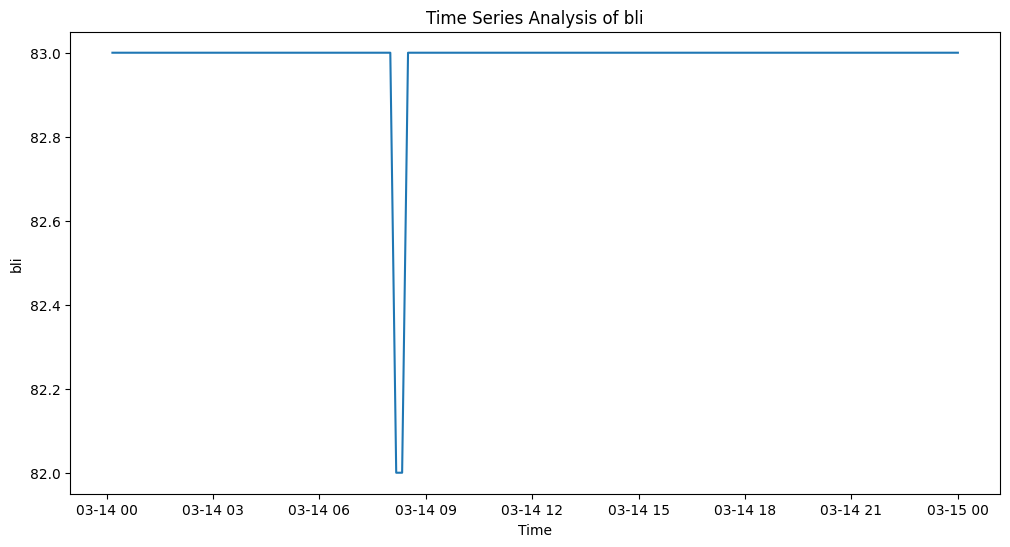

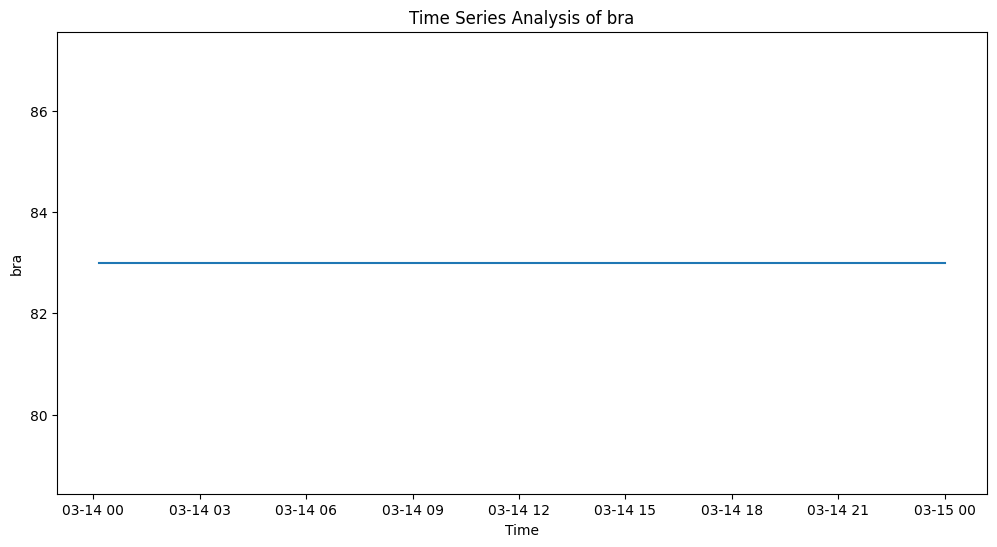

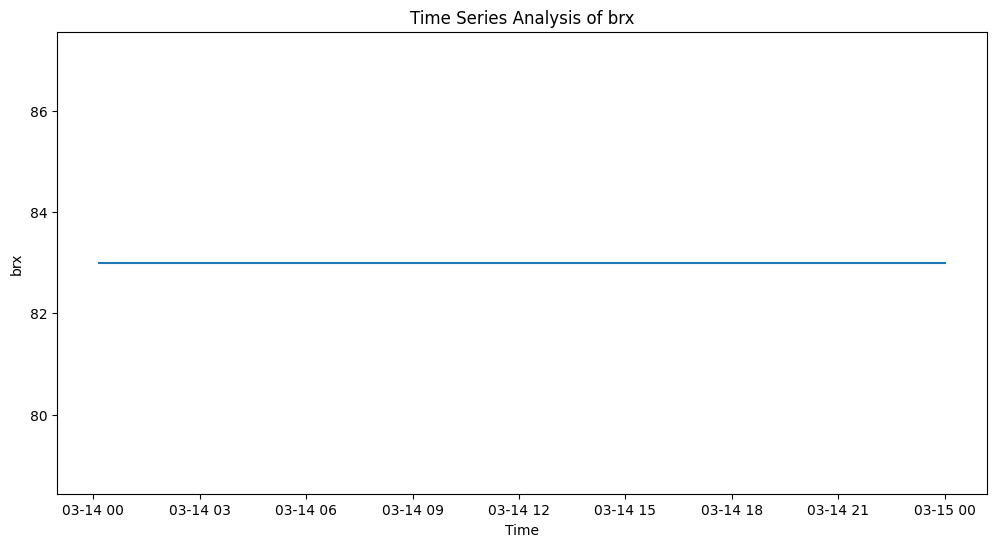

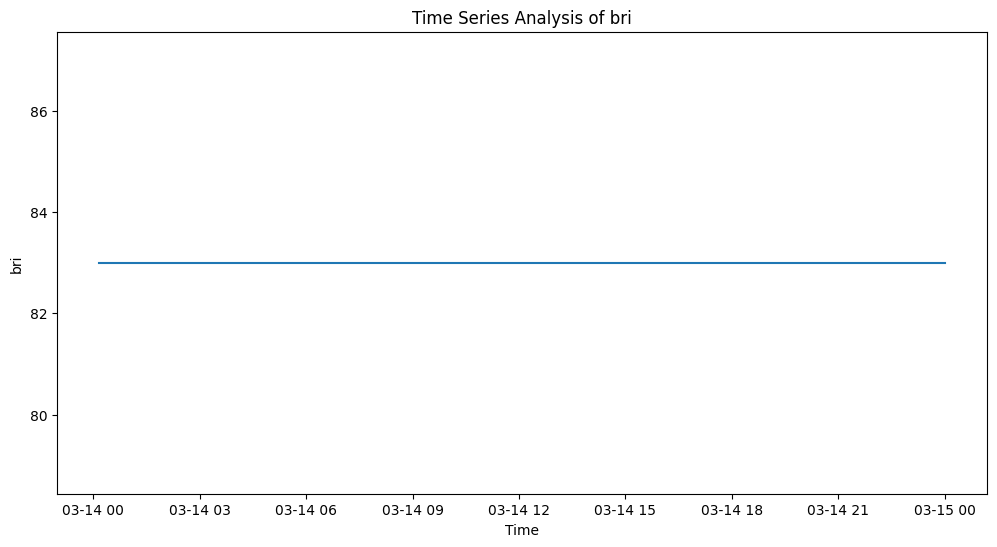

In [6]:
# Perform time series analysis for each column
for column in df.columns:
    if column not in ['date', 'time', 'period']:
        plt.figure(figsize=(12, 6))
        sns.lineplot(x=df.index, y=df[column])
        plt.title(f'Time Series Analysis of {column}')
        plt.xlabel('Time')
        plt.ylabel(column)
        plt.show()

In [7]:
# Exclude columns from correlation analysis
columns_to_exclude = ['datetime', 'date', 'time', 'period']
columns_for_correlation = [col for col in df.columns if col not in columns_to_exclude]

# Calculate correlation matrix
correlation_matrix = df[columns_for_correlation].corr()
#print(correlation_matrix)

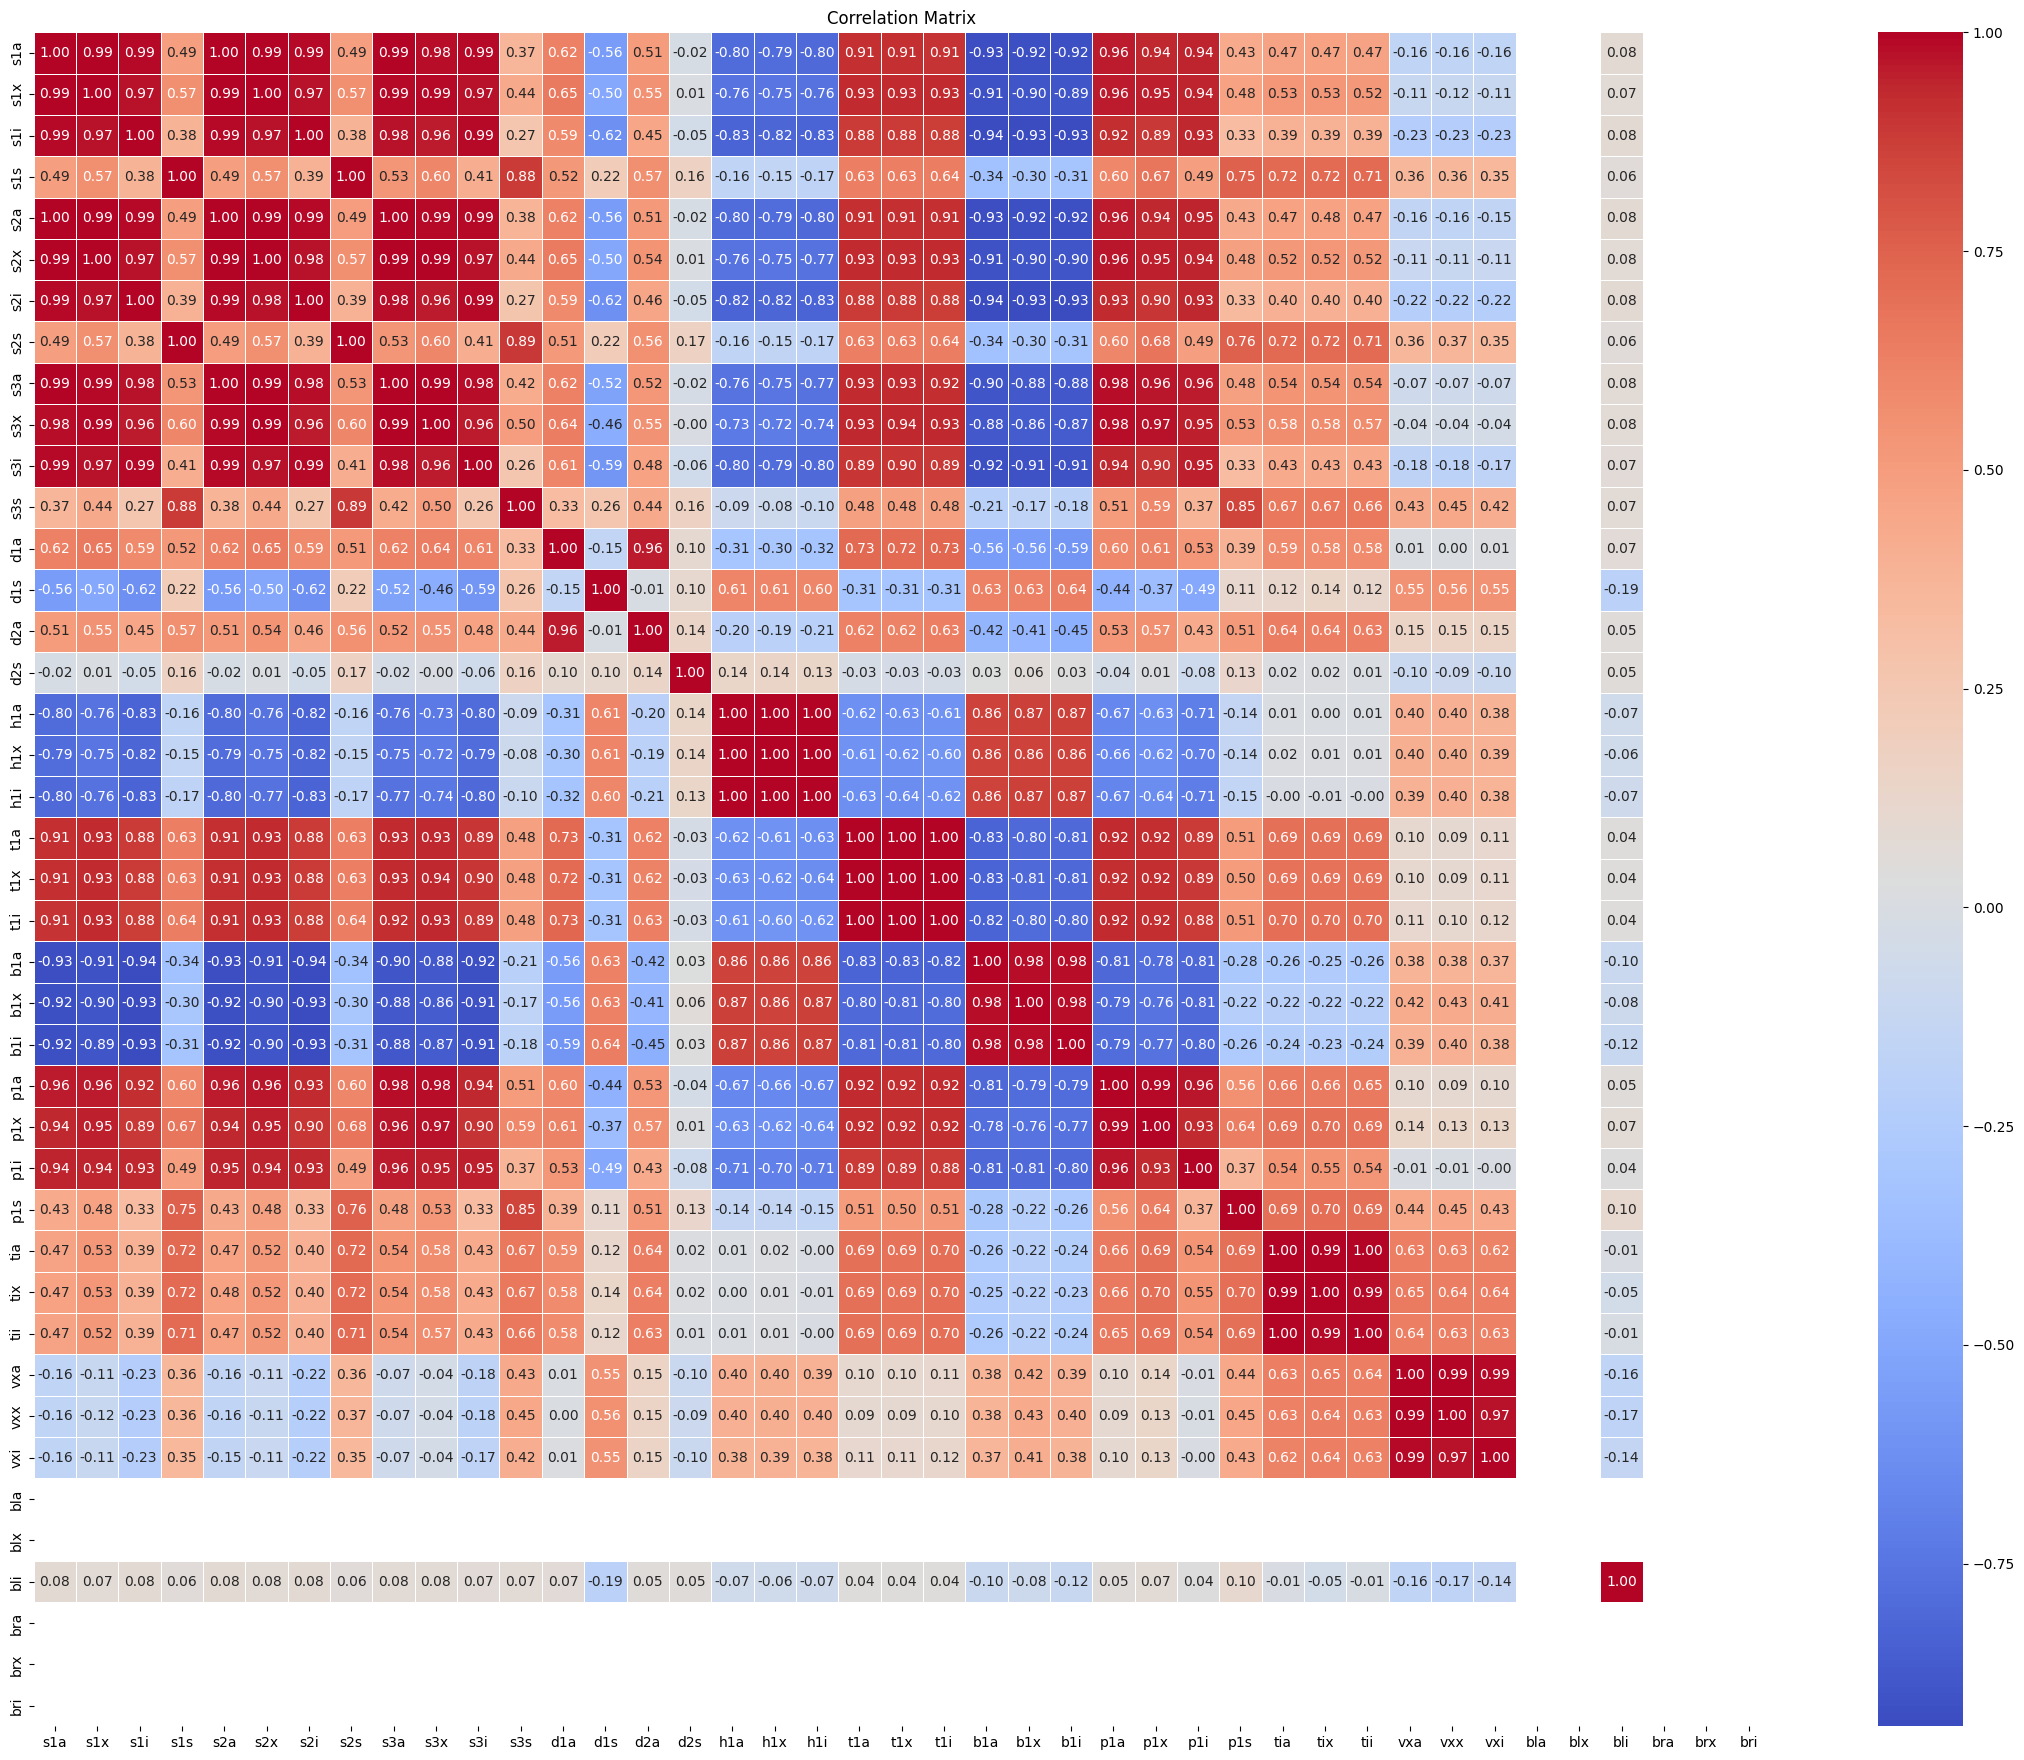

In [8]:
# Create a heatmap for the correlation matrix
#  The heatmap displays the correlation coefficients between different columns. 
# Positive values indicate a positive correlation, while negative values indicate a negative correlation. 
# Values closer to 1 or -1 indicate stronger correlations.
plt.figure(figsize=(28, 22))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

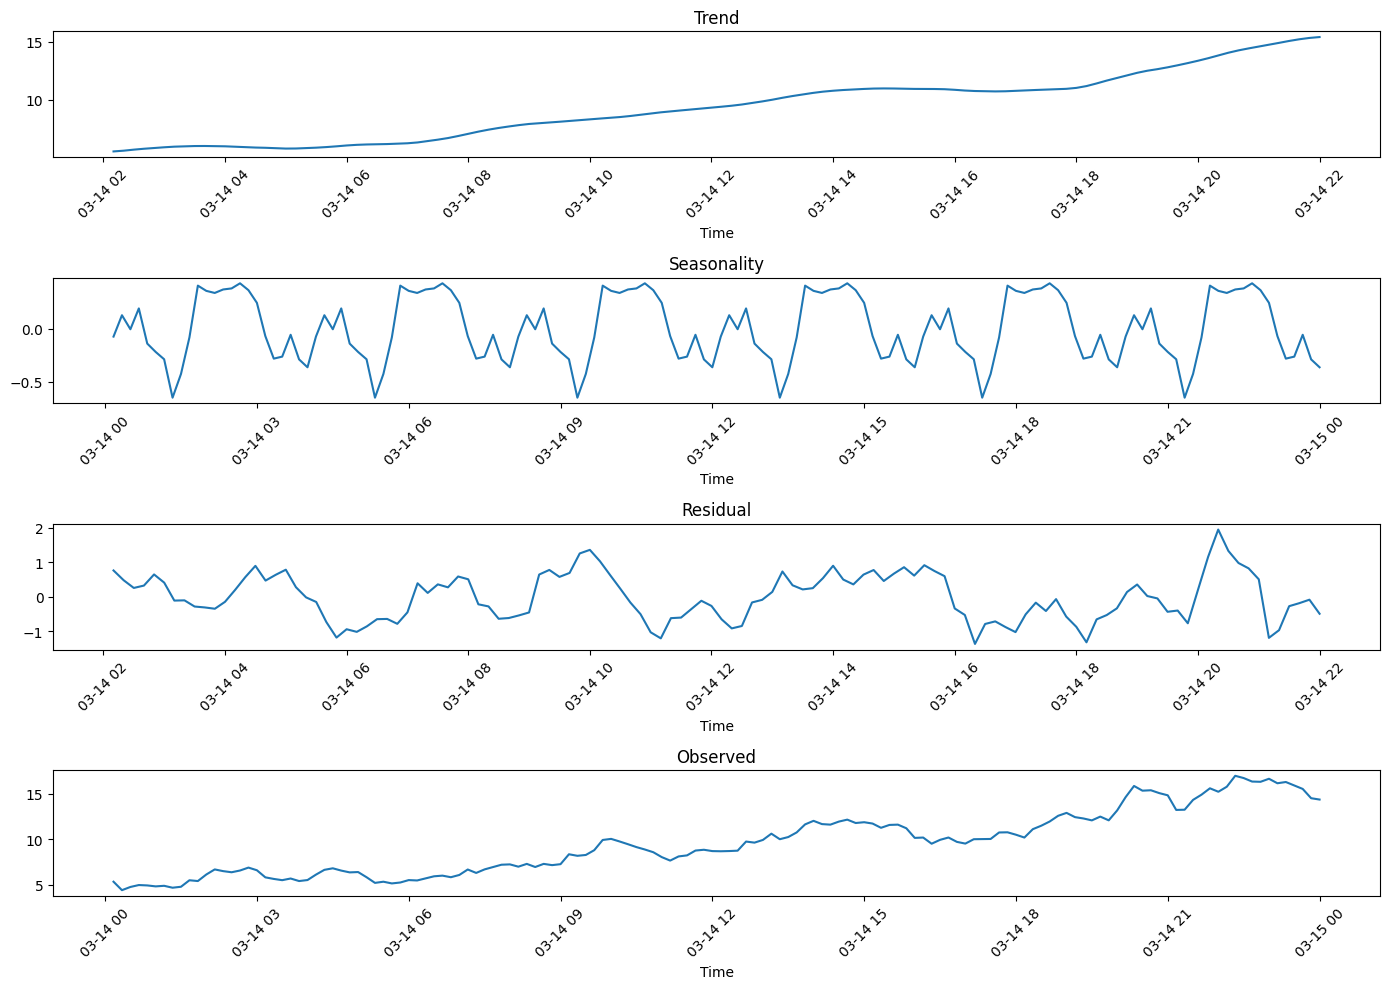

In [9]:
# Decompose the time series into trend, seasonality, and residual components
result = seasonal_decompose(df['s1a'], model='additive', period=24)  # Assuming seasonality is daily (24 hours)

# Increase figure size
plt.figure(figsize=(14, 10))

# Plot decomposed components
plt.subplot(4, 1, 1)
plt.plot(result.trend)
plt.title('Trend')
plt.xlabel('Time')
plt.xticks(rotation=45)

plt.subplot(4, 1, 2)
plt.plot(result.seasonal)
plt.title('Seasonality')
plt.xlabel('Time')
plt.xticks(rotation=45)

plt.subplot(4, 1, 3)
plt.plot(result.resid)
plt.title('Residual')
plt.xlabel('Time')
plt.xticks(rotation=45)

plt.subplot(4, 1, 4)
plt.plot(result.observed)
plt.title('Observed')
plt.xlabel('Time')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

/Users/mpillodi/anaconda3/envs/windanalysis/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  self._init_dates(dates, freq)
/Users/mpillodi/anaconda3/envs/windanalysis/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  self._init_dates(dates, freq)
/Users/mpillodi/anaconda3/envs/windanalysis/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


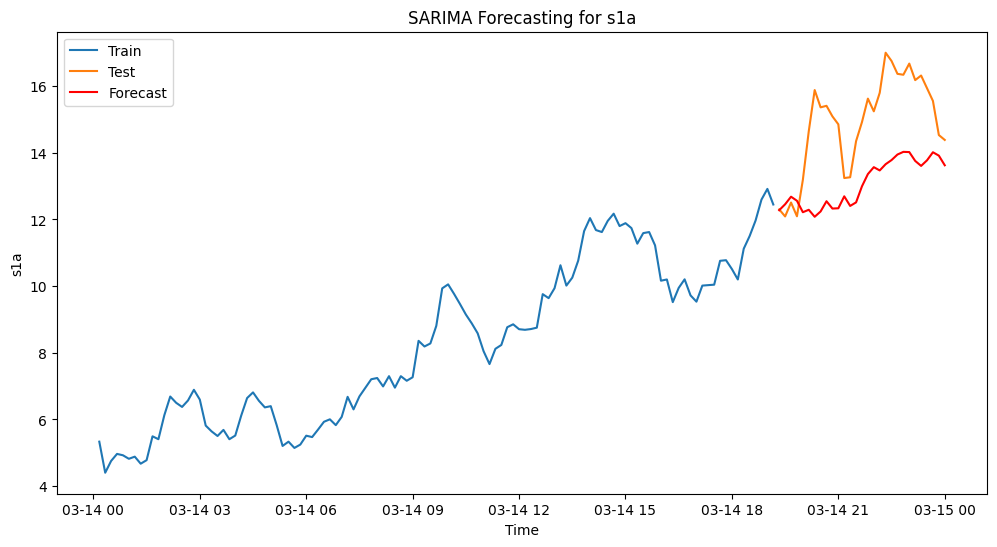

In [10]:
# Forecasting using SARIMA (Seasonal AutoRegressive Integrated Moving Average)
# Train-test split
train_size = int(len(df['s1a']) * 0.8)
train, test = df['s1a'][:train_size], df['s1a'][train_size:]

# Model fitting
model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 24))  # Adjust order and seasonal_order as needed
fit_model = model.fit(disp=False)

# Forecast
forecast = fit_model.get_forecast(steps=len(test))
predicted_values = forecast.predicted_mean

# Visualize
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, predicted_values, label='Forecast', color='red')
plt.title('SARIMA Forecasting for s1a')
plt.xlabel('Time')
plt.ylabel('s1a')
plt.legend()
plt.show()